# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, make_scorer)

from sklearn.utils import class_weight

from xgboost import XGBClassifier, XGBRFClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


## Loading the dataset

In [2]:
file_url = './BankChurners.csv'
data_original = pd.read_csv(file_url, index_col='CLIENTNUM') # since the data dictionary indicated that CLIENTNUM is the unique identifier for the customer holding the account, we will use it as the index column. This saves us from having to drop it later.

In [3]:
df = data_original.copy()
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Overview

- Observations
- Sanity checks

In [4]:
df.shape

(10127, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


In [7]:
# for each column that is not numeric, print the column's unique values
for col in df.select_dtypes(exclude=np.number).columns:
    print(col, df[col].unique())

Attrition_Flag ['Existing Customer' 'Attrited Customer']
Gender ['M' 'F']
Education_Level ['High School' 'Graduate' 'Uneducated' nan 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status ['Married' 'Single' nan 'Divorced']
Income_Category ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'abc']
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']


#### Observations so far:
- There are 10127 rows and 20 columns in the dataset.
- In the categorical columns, "Attrition_Flag" can be roughly transalted as "Active" and "Inactive" customers. Therefore, we can make it as a binary (0 & 1) column.

In [8]:
# map Attrition_Flag to be 0 or 1: 0 for Existing Customer, 1 for Attrited Customer
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [9]:
df[df["Income_Category"] == 'abc']

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
709327383,0,45,F,2,Graduate,Married,abc,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
718813833,0,44,F,3,Uneducated,Single,abc,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
708300483,1,66,F,0,Doctorate,Married,abc,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
720572508,0,38,F,4,Graduate,Single,abc,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
711427458,0,44,F,5,Graduate,Married,abc,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711149133,1,30,F,1,Graduate,Married,abc,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
714677583,1,50,F,3,Doctorate,Single,abc,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
718170033,0,42,F,4,Uneducated,Married,abc,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000


Looks like many of them are with Blue card. Let's sanity-check by grouping the count by card category.

In [10]:
df[df["Income_Category"] == 'abc'].groupby("Card_Category")["Income_Category"].value_counts()

Card_Category  Income_Category
Blue           abc                1045
Gold           abc                   9
Platinum       abc                   5
Silver         abc                  53
Name: Income_Category, dtype: int64

Many of the income category that's "abc" are Blue card. Since blue card is the most basic tier (lowest tier), it seems like it would be the card that is issued with the least restrictions. In this case, perhaps the income was not gathered at the time of issue if credit score is good enough. Therefore, we can treat "abc" as "Unknown".

Let us be cautious and check Blue card's income category distribution.

In [11]:
df[df["Card_Category"] == 'Blue'].groupby("Income_Category")["Card_Category"].value_counts()

Income_Category  Card_Category
$120K +          Blue              645
$40K - $60K      Blue             1675
$60K - $80K      Blue             1273
$80K - $120K     Blue             1395
Less than $40K   Blue             3403
abc              Blue             1045
Name: Card_Category, dtype: int64

1045/10127 = 10.3% of the Blue card's income category is "abc". This is a significant portion, so we cannot simply drop the rows with "abc" income category. We will treat "abc" as "Unknown" for now.

Onto the second point: since the income category is ordinal, we can simply replace the categories with numbers. We may need a few experiments to do that. For now, let's replace it with ranked tiers. Meaning:

* abc: 0
* Less than $40K: 1
* $40K - $60K: 2
* $60K - $80K: 3
* $80K - $120K: 4
* $120K +: 5

In [12]:
df["Income_Tier"] = df["Income_Category"].replace(
    {
        "abc": 0,
        "Less than $40K": 1,
        "$40K - $60K": 2,
        "$60K - $80K": 3,
        "$80K - $120K": 4,
        "$120K +": 5,
    }
).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  

We will deal with the NaN values after EDA.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [16]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariant Analysis

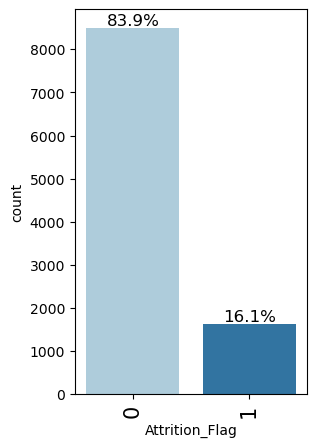

In [17]:
labeled_barplot(df, "Attrition_Flag", perc=True)

**Observations:**

- 16.1% of the customers have closed their account.
- This is the target variable that we need to predict.
- The data is highly imbalanced - we will need to either undersample or oversample the minority class to avoid bias in the model.

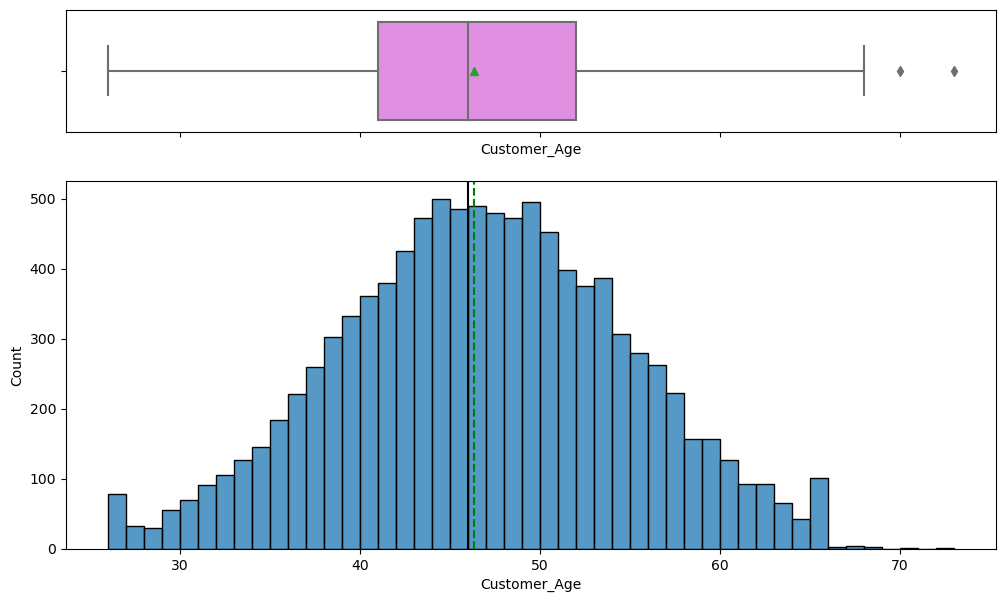

In [18]:
histogram_boxplot(df, "Customer_Age")

**Observations:**

- Customer age is normally distributed with a few outliers on the higher end.

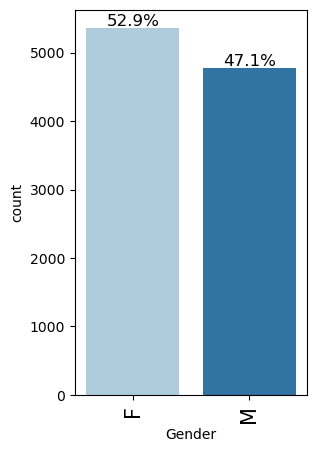

In [19]:
labeled_barplot(df, "Gender", perc=True)

**Observations:**

- Gender is almost equally distributed.

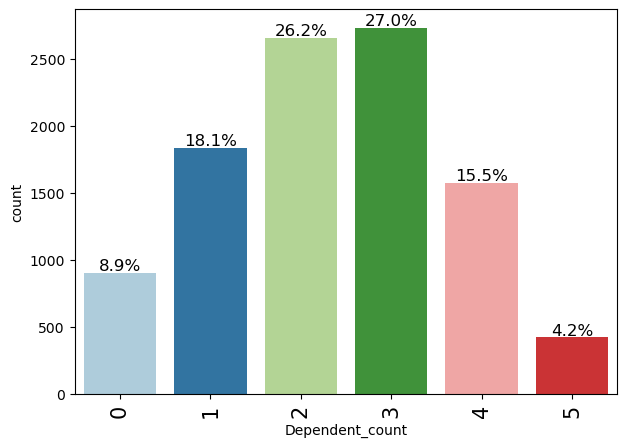

In [20]:
labeled_barplot(df, "Dependent_count", perc=True)

**Observations:**

- Most of the customers have 2 or 3 dependents.

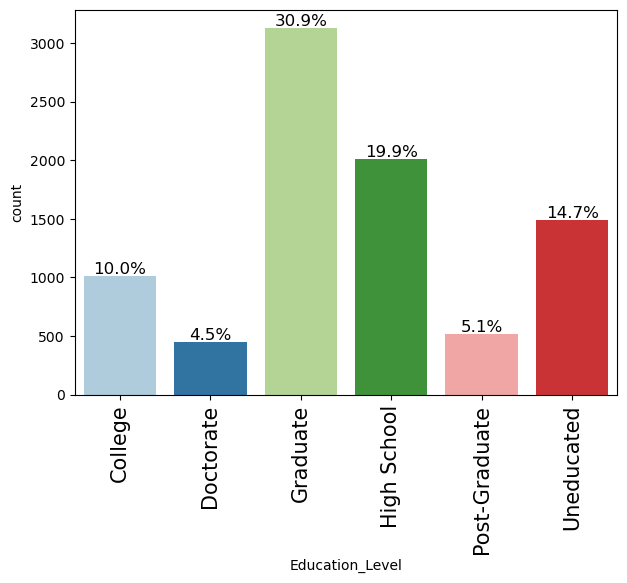

In [21]:
labeled_barplot(df, "Education_Level", perc=True)

**Observations:**

- Most of the customers are graduates.
- A good portion of the customers are uneducated.
- There are a few customers with unknown education level. We can replace the unknown education level with the mode of the column.

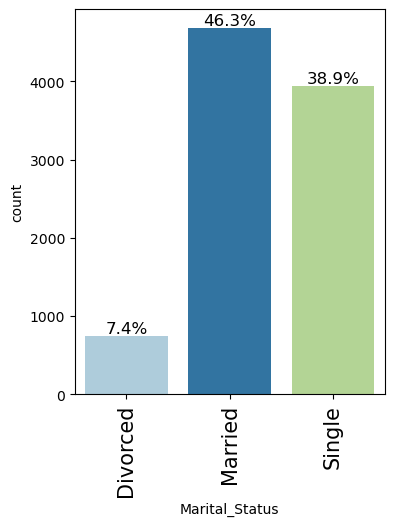

In [22]:
labeled_barplot(df, "Marital_Status", perc=True)

**Observations:**

- Most of the customers are married.
- There are a few customers with unknown marital status. We can replace the unknown marital status with the mode of the column.

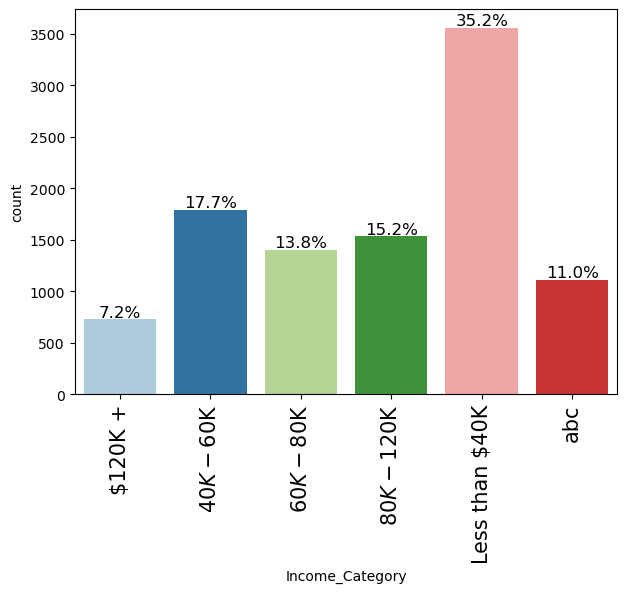

In [23]:
labeled_barplot(df, "Income_Category", perc=True)

**Observations:**

- 35.2% of the customers have an income of less than 40K.
- Implication: that means, a good 35.2% of customers do not have a good income. This could also impact the credit score and credit limit. On top of that, these customers may run into financial troubles more often than the rest of the customers.
- It would be natural to check the relationship between income category and attrition flag when we do multi-variate analysis.
- For the unknown ("abc") category, we need to be careful about replacing it with the mode of the column.
- Let's check the income as numeric value (as columnm "Income") as well. 

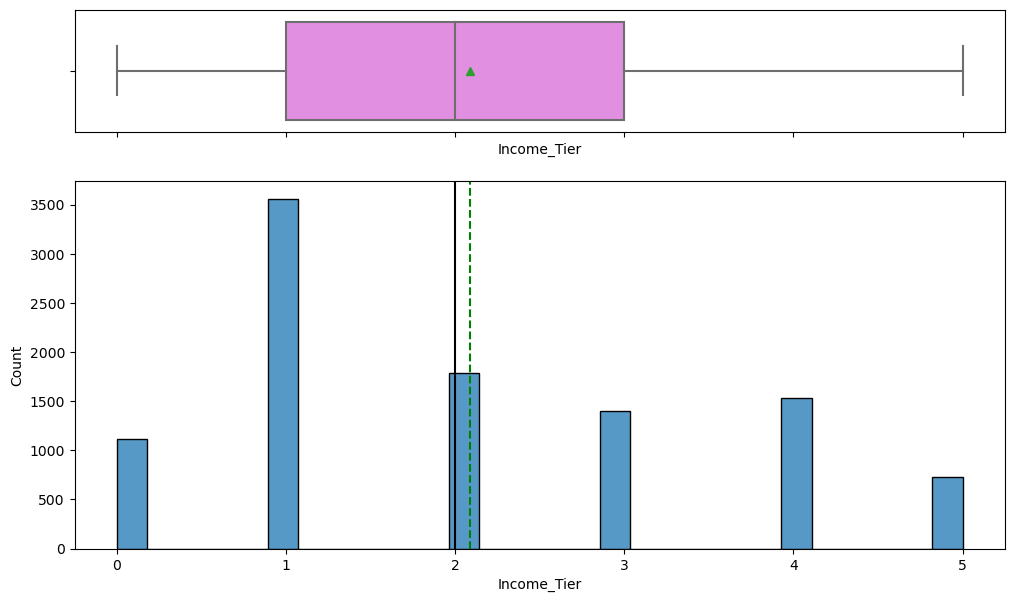

In [24]:
histogram_boxplot(df, "Income_Tier")

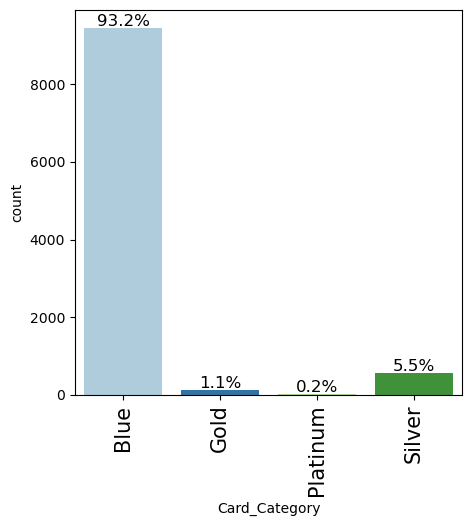

In [25]:
labeled_barplot(df, "Card_Category", perc=True)

**Observations:**

- Most of the customers have a blue card.
- It is very imbalanced.

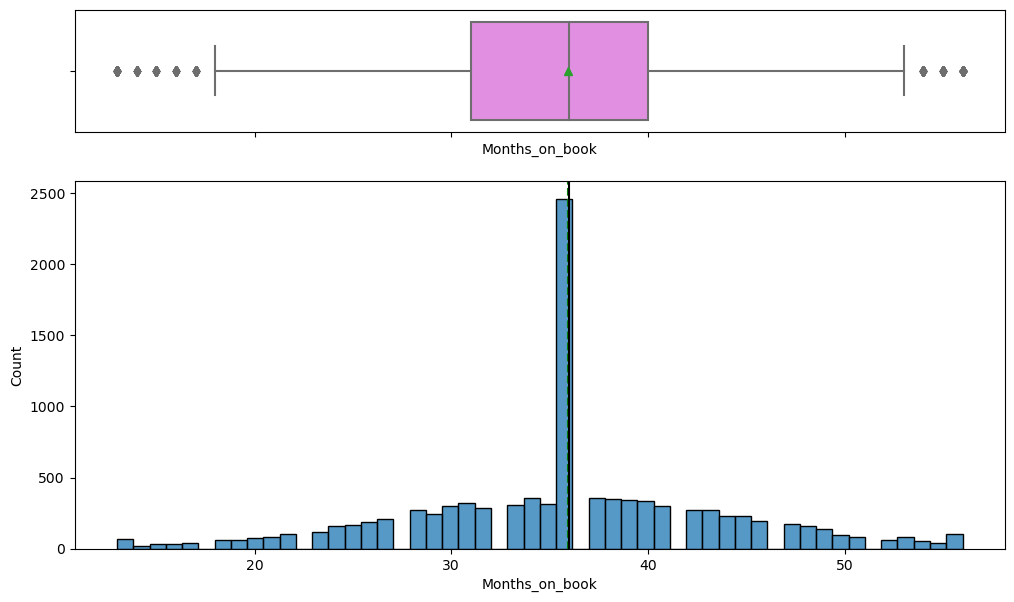

In [26]:
histogram_boxplot(df, "Months_on_book")

**Observations:**

- There is an abnormal spike at 36 months. Does that mean many of the customers joined in one single campaign?
- We may want to check this against other variables to see if there is any pattern.
- Otherwise it's normally distributed.

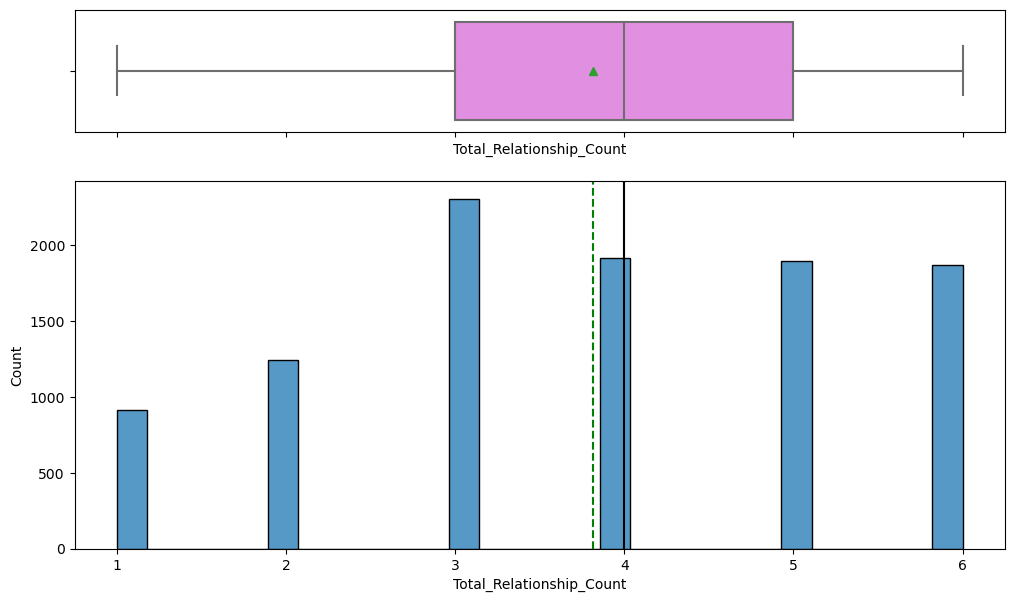

In [27]:
histogram_boxplot(df, "Total_Relationship_Count")

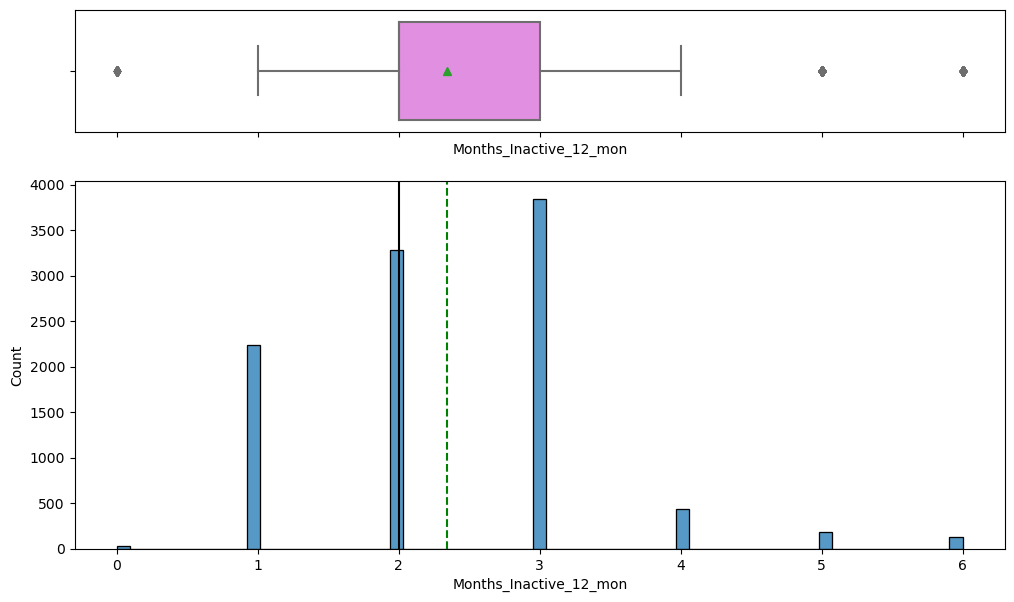

In [28]:
histogram_boxplot(df, "Months_Inactive_12_mon")

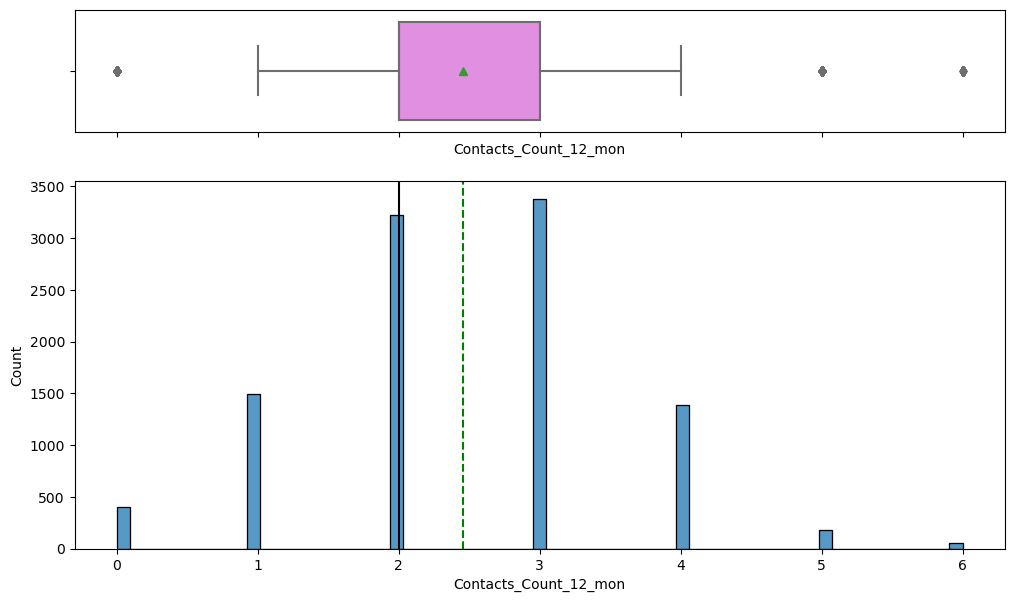

In [29]:
histogram_boxplot(df, "Contacts_Count_12_mon")

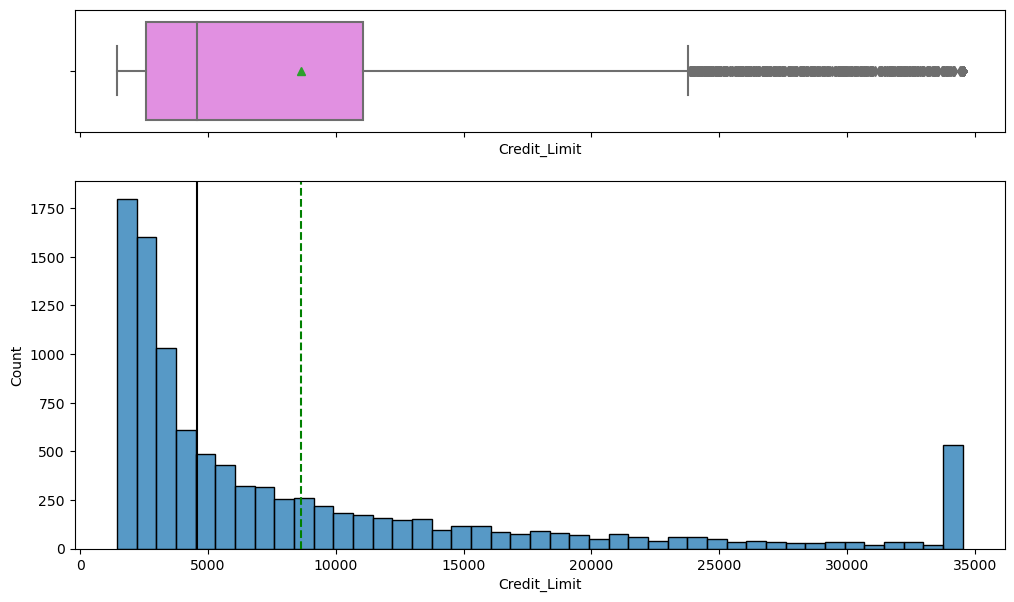

In [30]:
histogram_boxplot(df, "Credit_Limit")

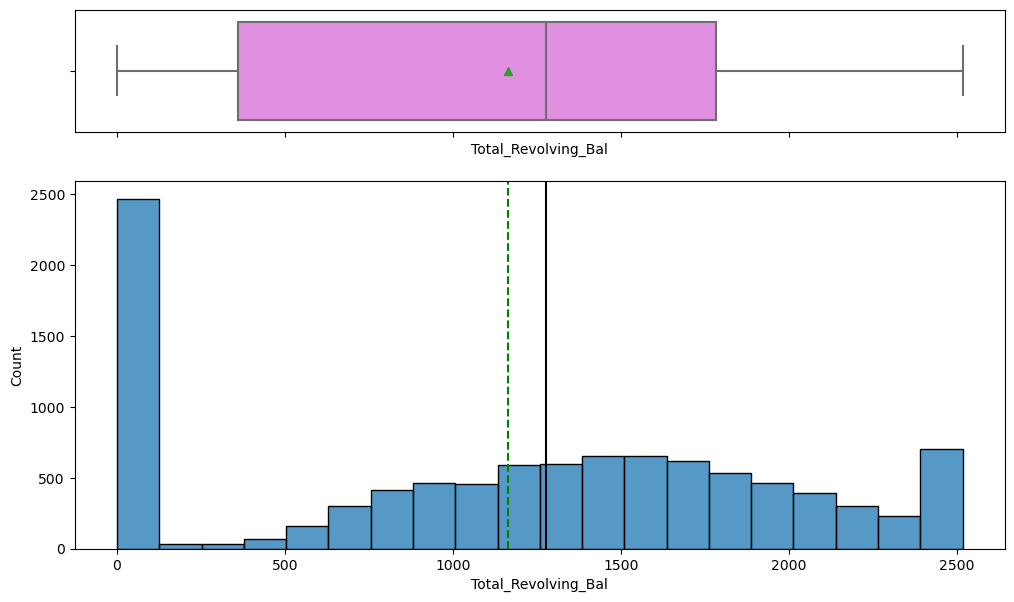

In [31]:
histogram_boxplot(df, "Total_Revolving_Bal")

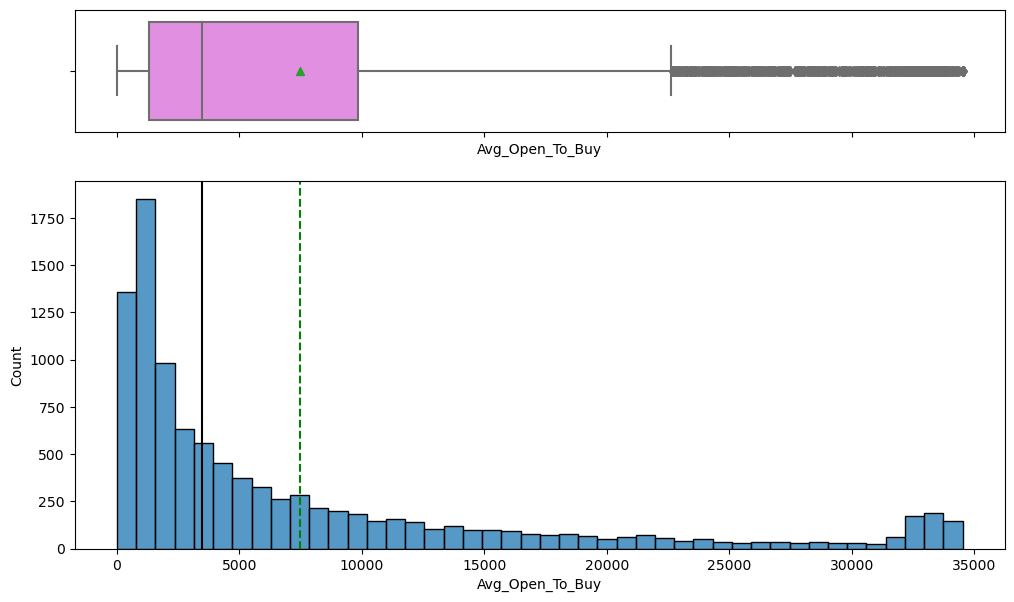

In [32]:
histogram_boxplot(df, "Avg_Open_To_Buy")

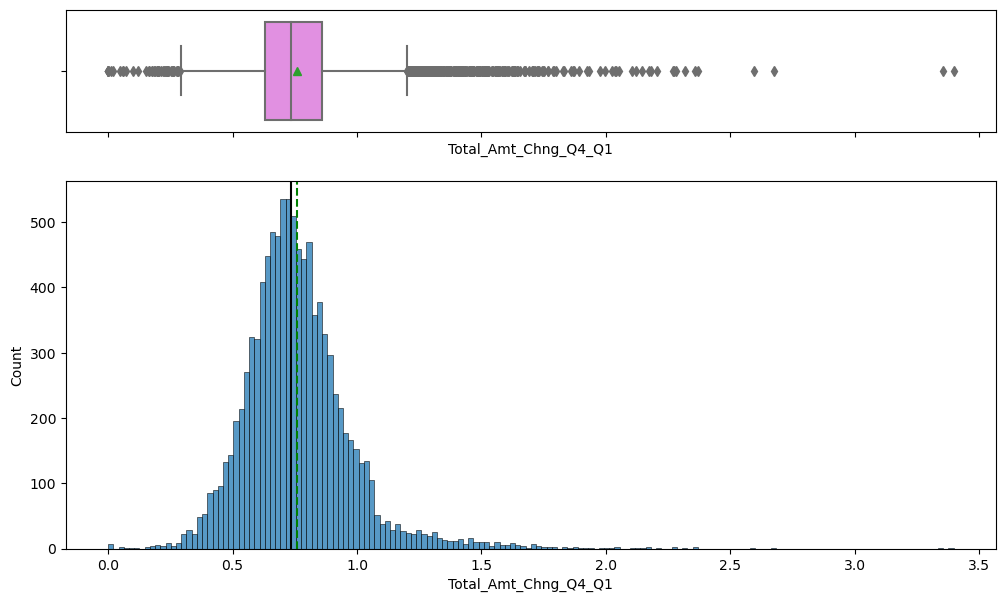

In [33]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

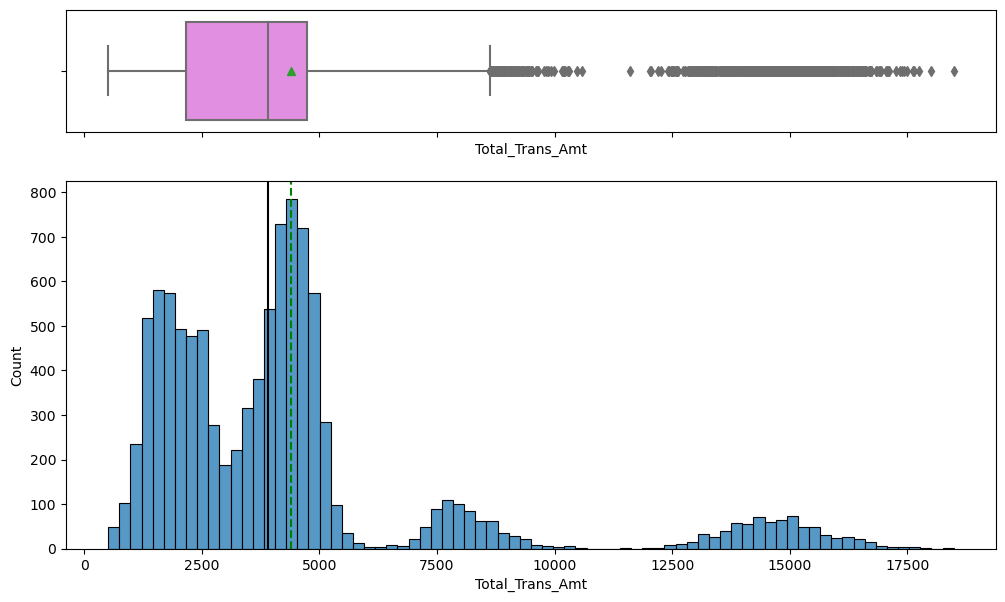

In [34]:
histogram_boxplot(df, "Total_Trans_Amt")

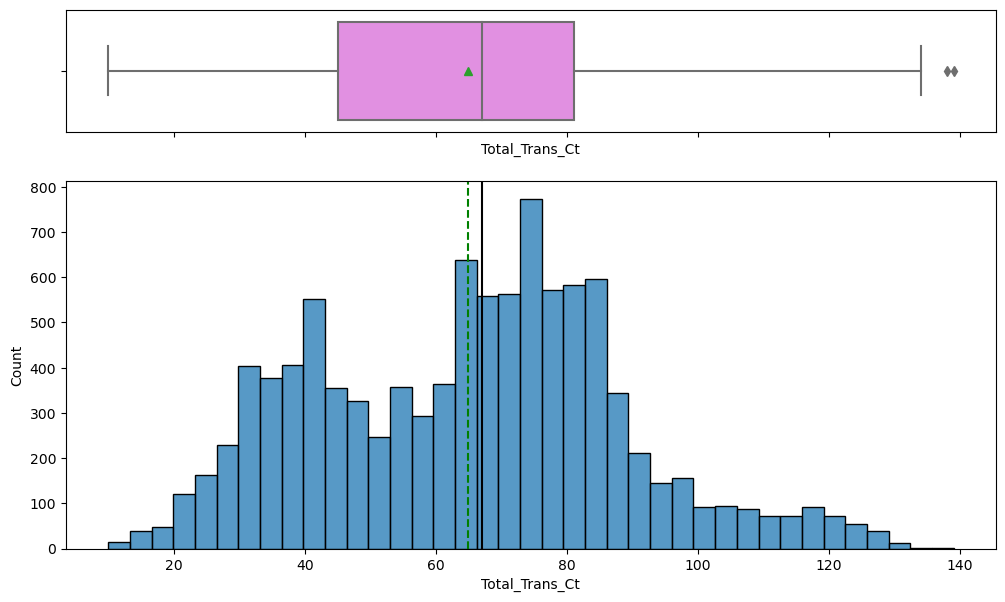

In [35]:
histogram_boxplot(df, "Total_Trans_Ct")

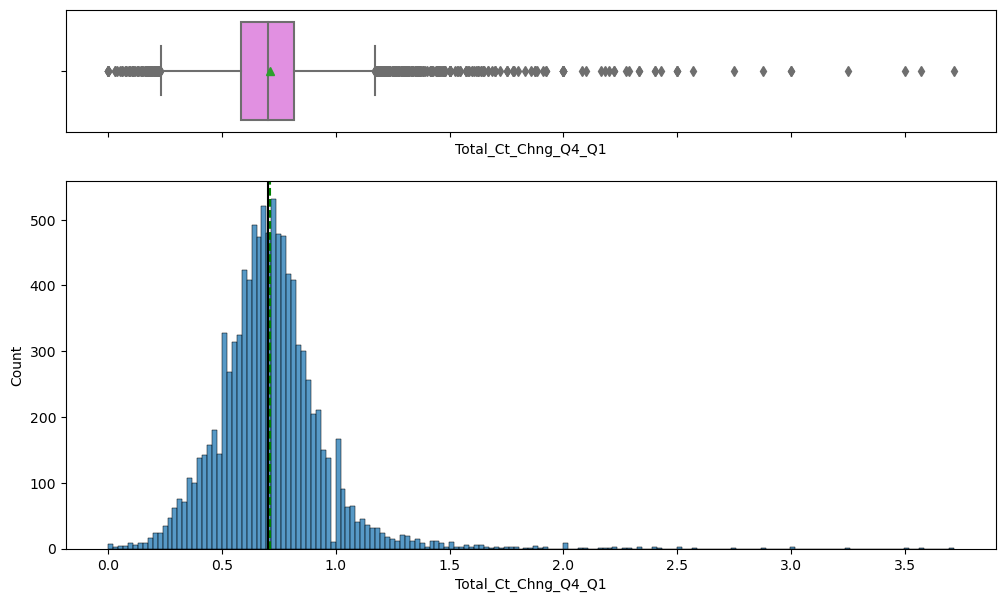

In [36]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

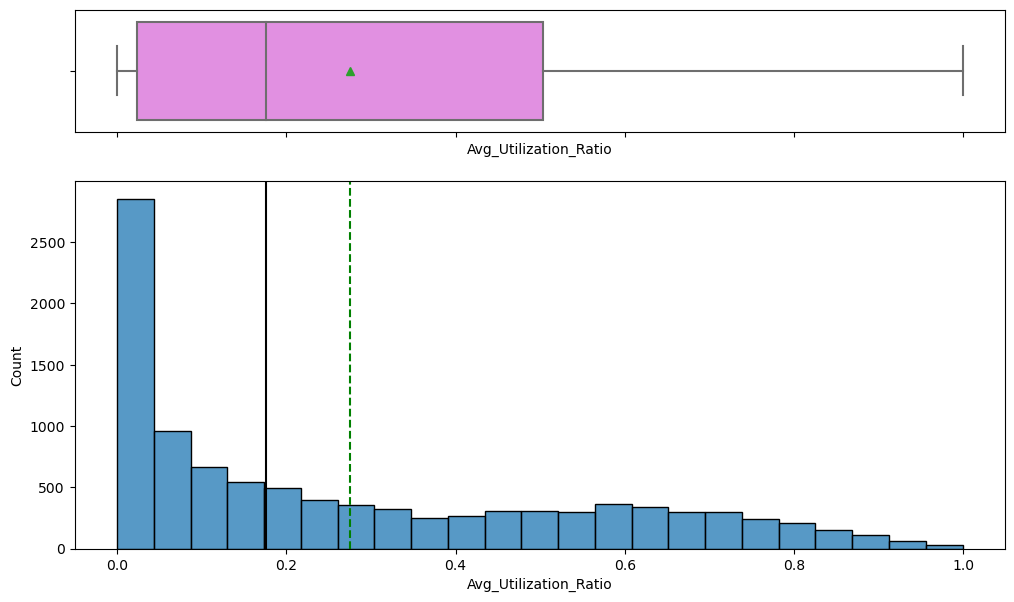

In [37]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

#### Multivariant Analysis

Heatmap

/tmp/ipykernel_158857/551032507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


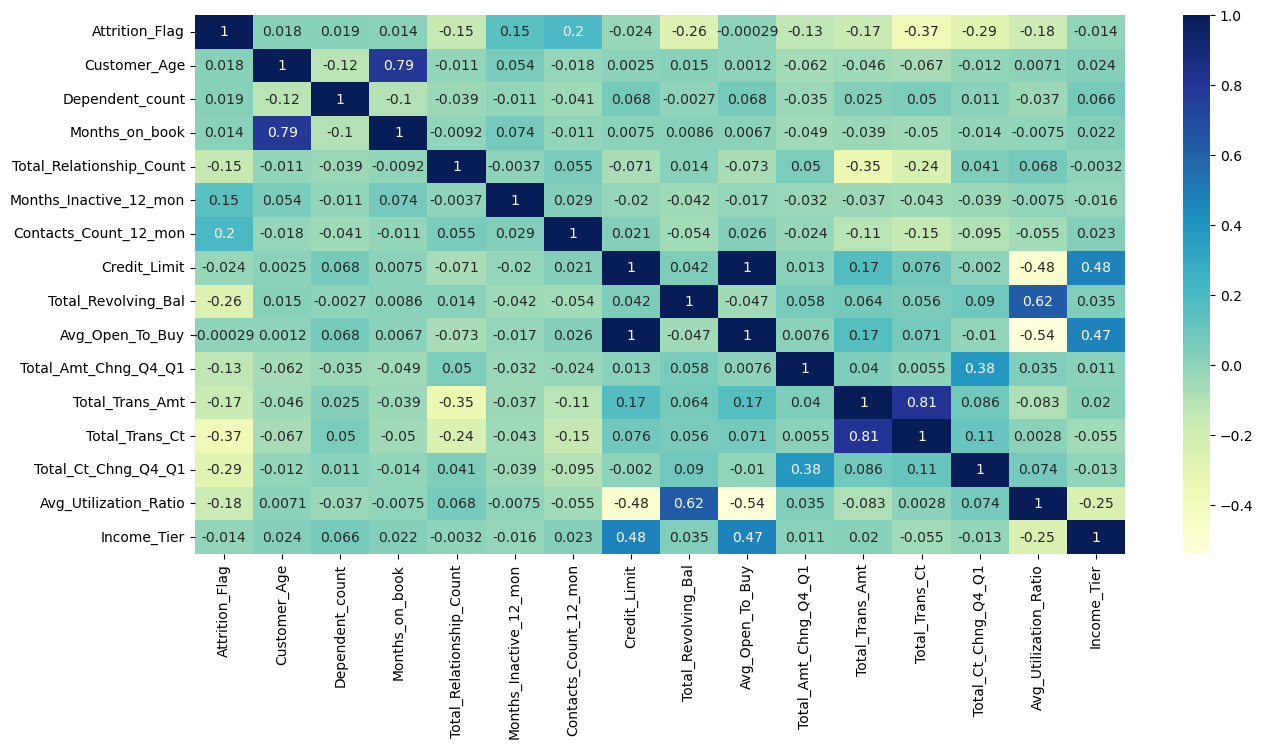

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

**Observations:**

- There are a few variables that are highly correlated with each other.
- Months on book and Customer age are highly correlated.
- Credit limit and Avg open to buy are highly correlated.
- Total transaction amount and Total transaction count are highly correlated.
- Total revolving balance and Avg utilization ratio are highly correlated.

Gender          F     M    All
Income_Tier                   
All          5358  4769  10127
4               0  1535   1535
3               0  1402   1402
2            1014   776   1790
5               0   727    727
1            3284   277   3561
0            1060    52   1112
------------------------------------------------------------------------------------------------------------------------


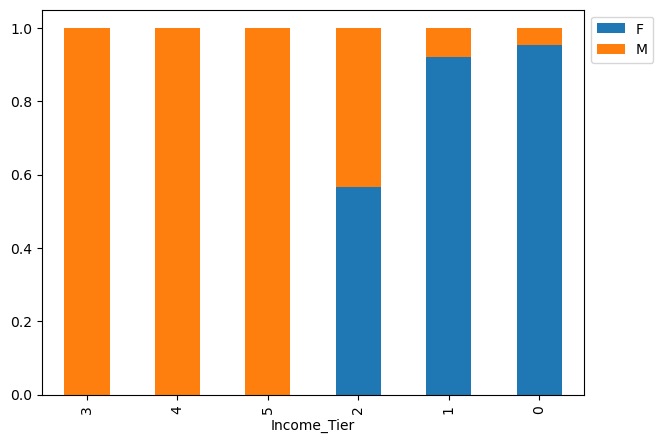

In [39]:
# stacked graph between Income and Gender
stacked_barplot(df, "Income_Tier", "Gender")

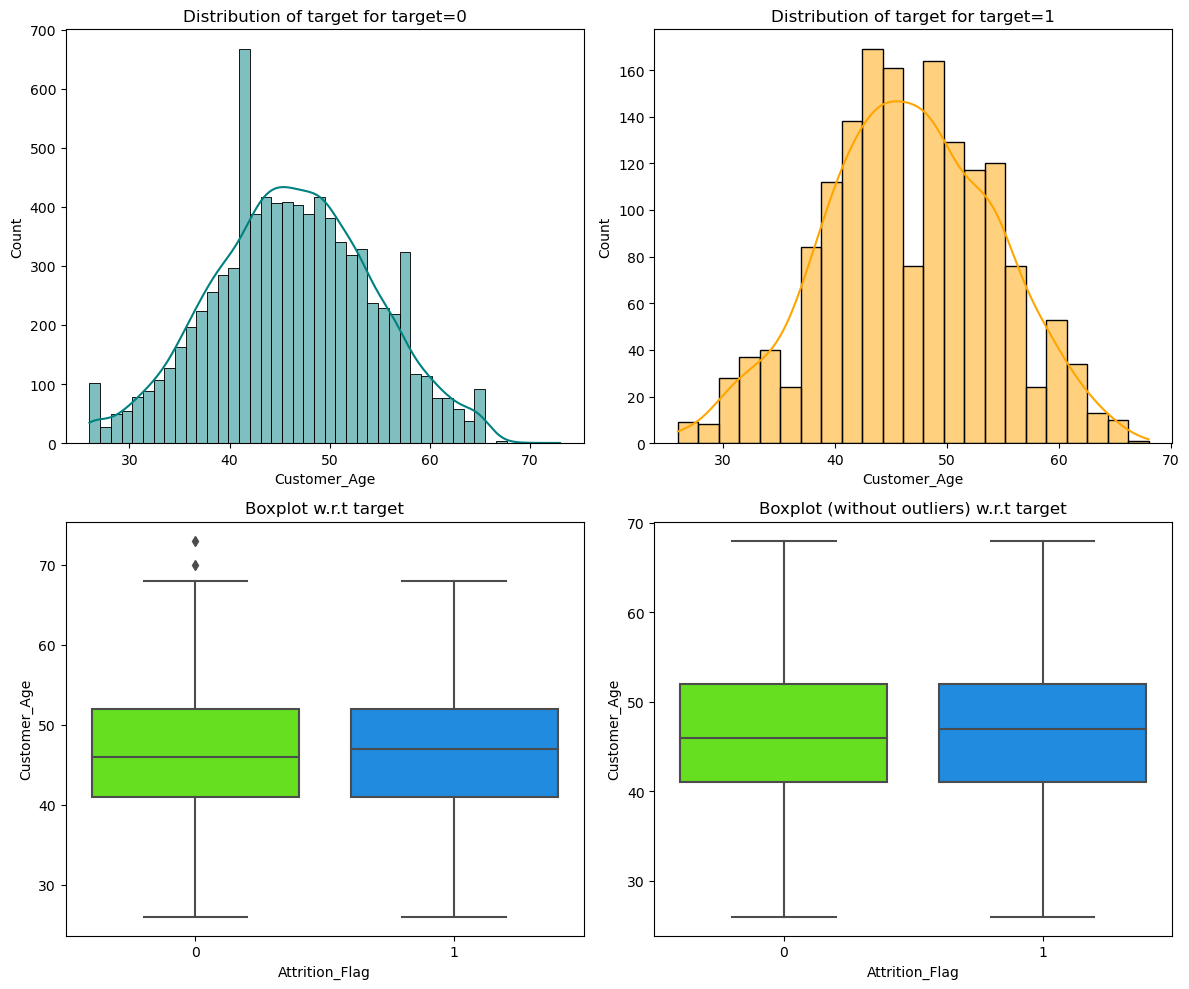

In [40]:
# visualize relationship between Attrition Flag and Customer Age
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


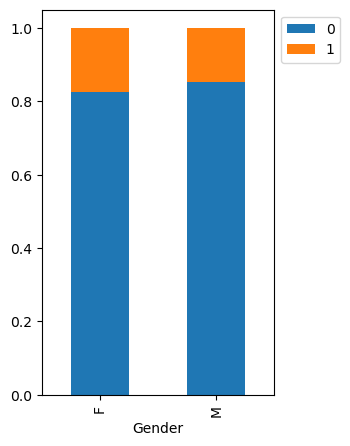

In [41]:
# visualize relationship between Attrition Flag and Gender
stacked_barplot(df, "Gender", "Attrition_Flag")

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


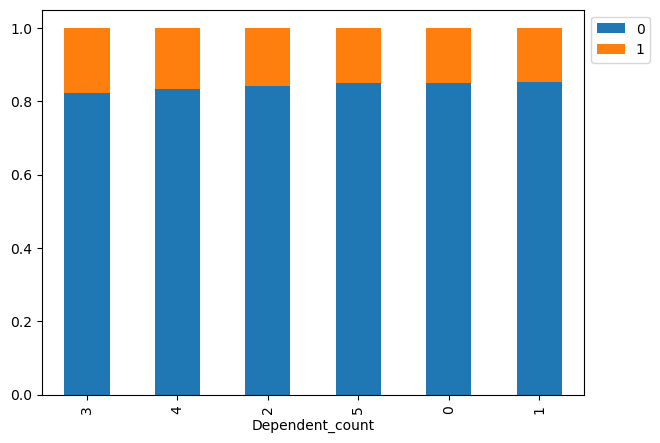

In [42]:
# visualize relationship between Attrition Flag and Dependent Count
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


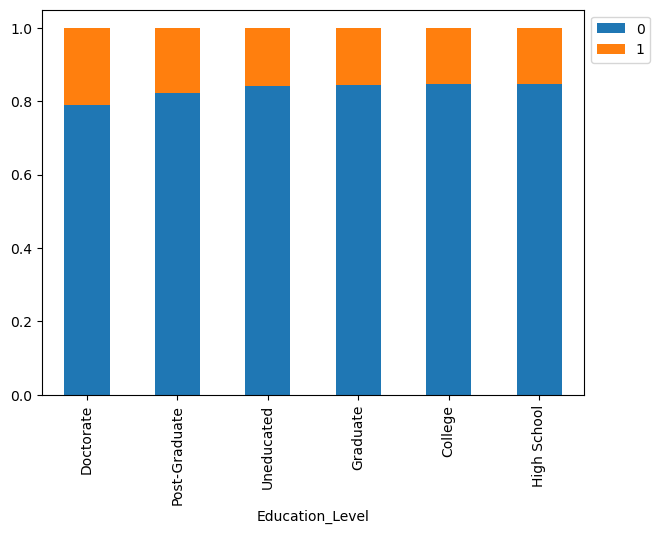

In [43]:
# visualize relationship between Attrition Flag and Education Level
stacked_barplot(df, "Education_Level", "Attrition_Flag")

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


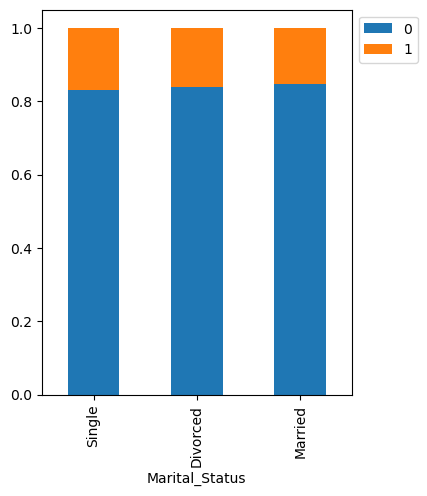

In [44]:
# visualize relationship between Attrition Flag and Marital Status
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


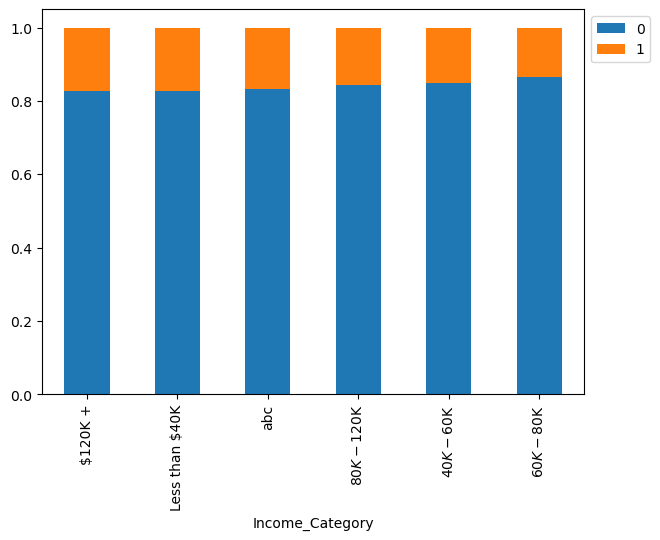

In [45]:
# visualize relationship between Attrition Flag and Income Category
stacked_barplot(df, "Income_Category", "Attrition_Flag")

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


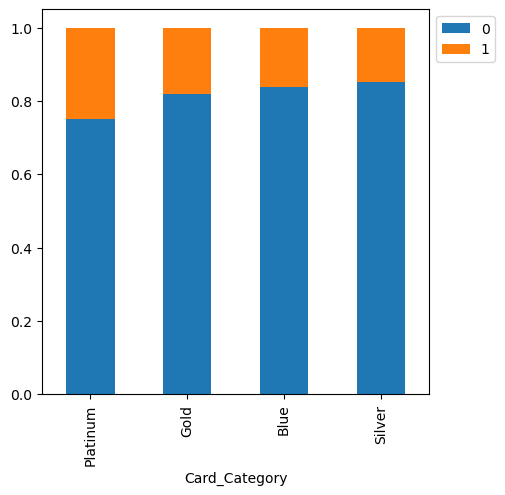

In [46]:
# visualize relationship between Attrition Flag and Card Category
stacked_barplot(df, "Card_Category", "Attrition_Flag")

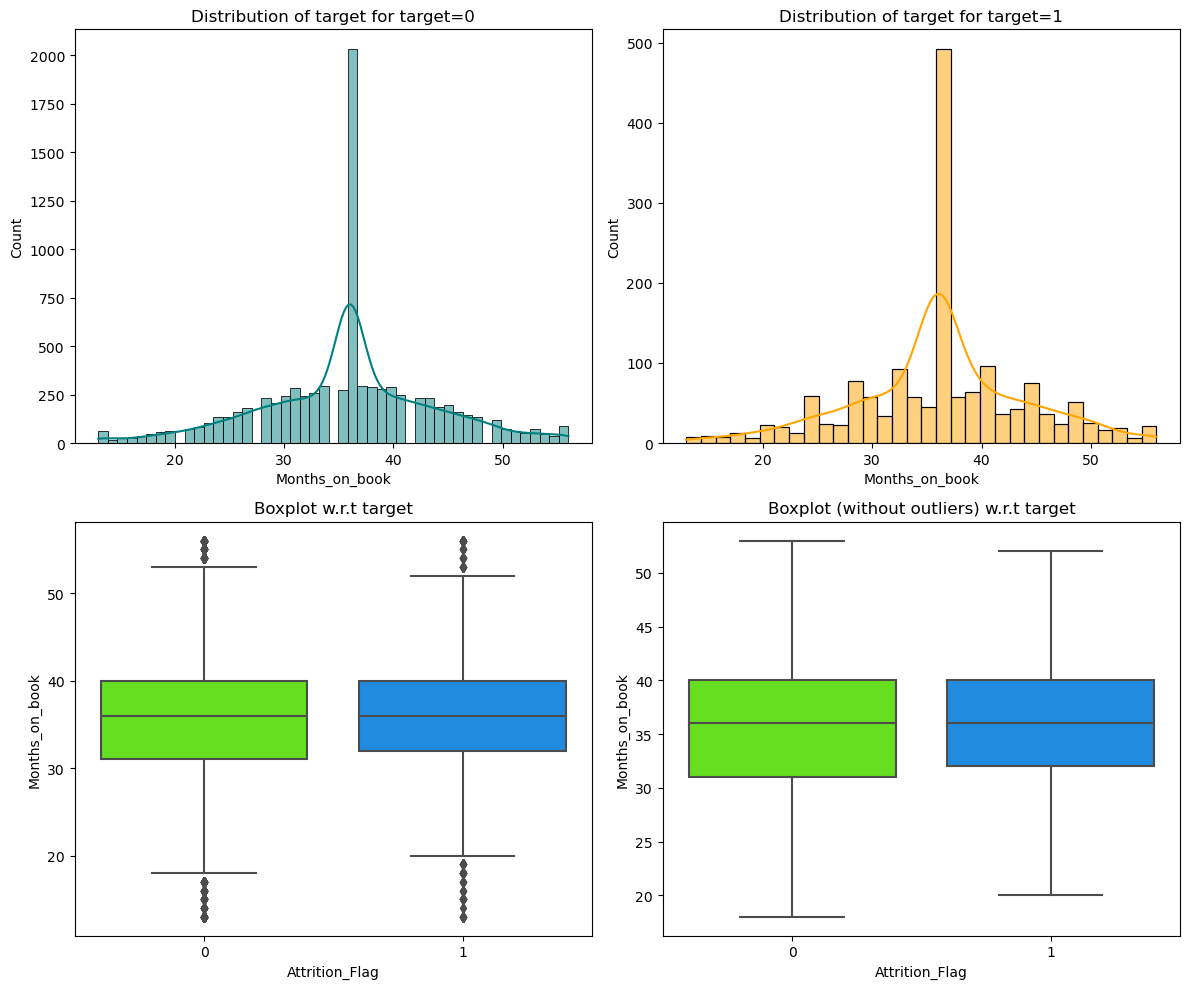

In [47]:
# visualize relationship between Attrition Flag and Months on Book
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


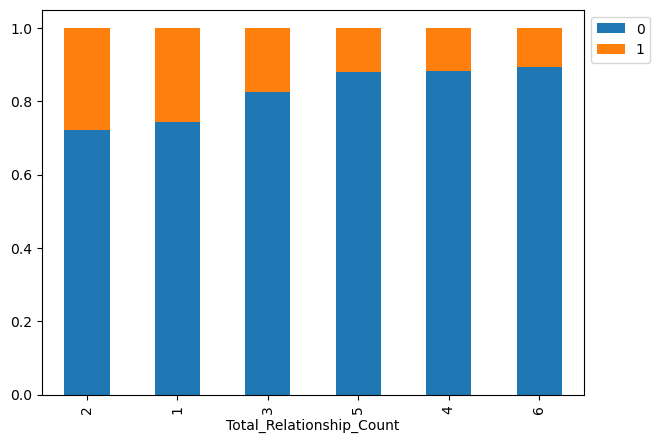

In [48]:
# visualize relationship between Attrition Flag and Total Relationship Count
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


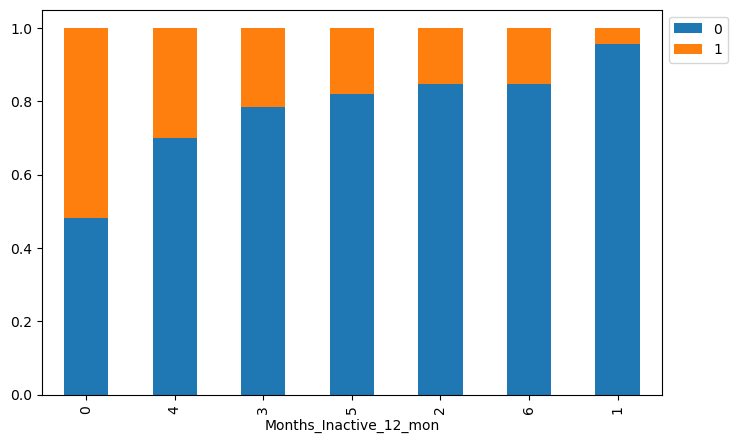

In [49]:
# visualize relationship between Attrition Flag and Months Inactive 12 mon
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


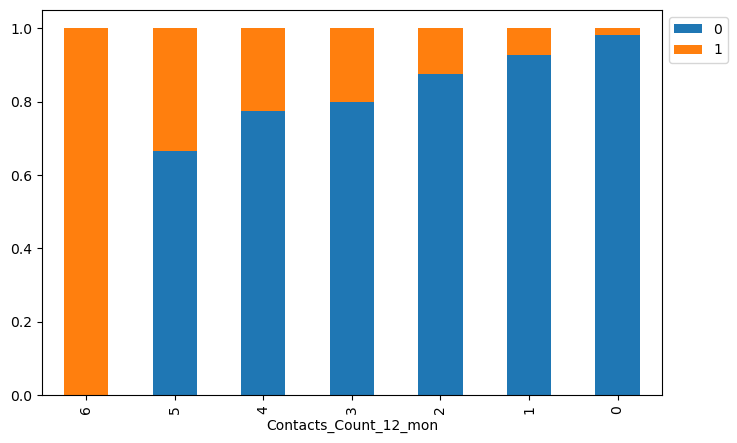

In [50]:
# visualize relationship between Attrition Flag and Contacts Count 12 mon
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

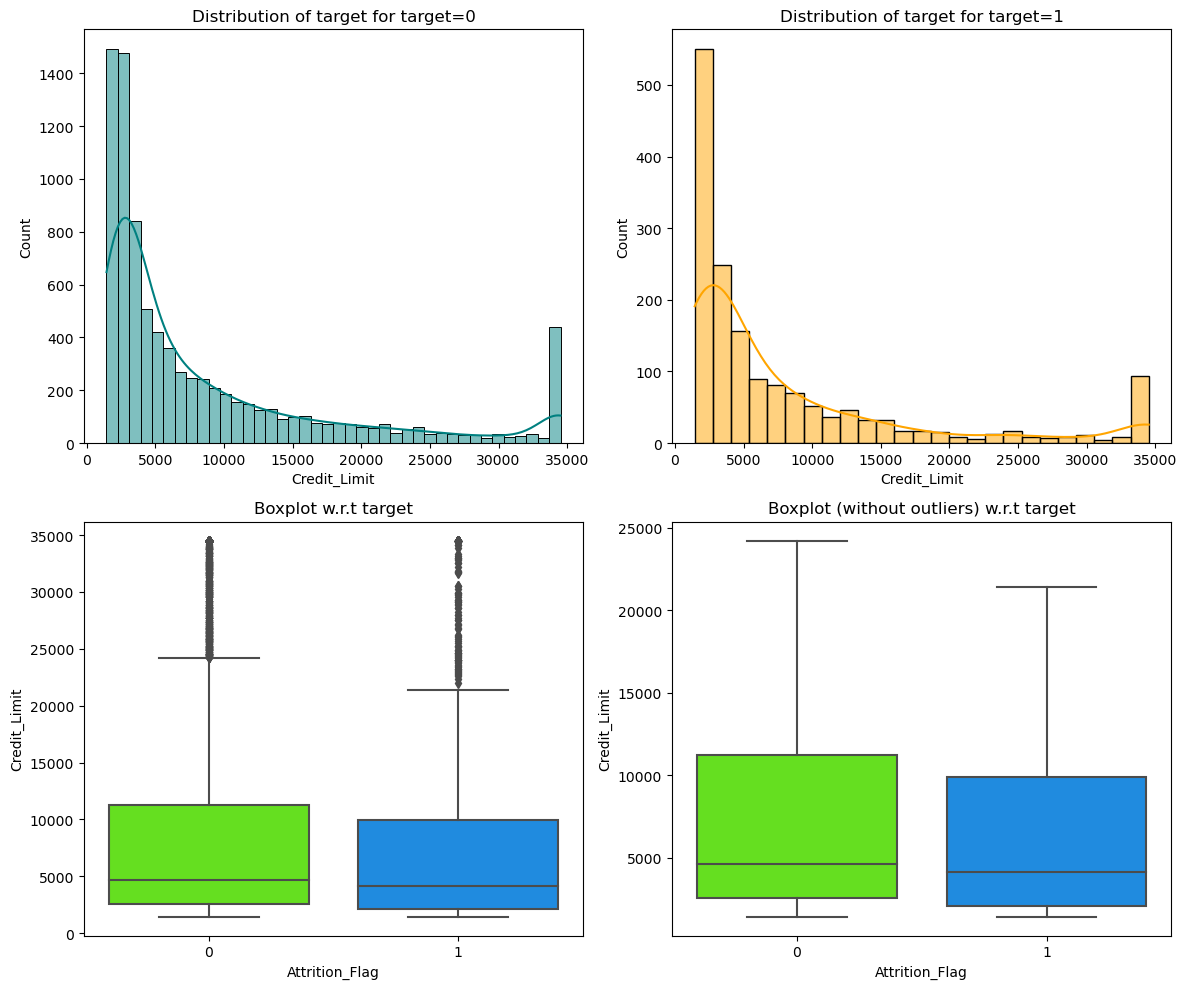

In [51]:
# visualize relationship between Attrition Flag and Credit Limit
distribution_plot_wrt_target(df, "Credit_Limit", "Attrition_Flag")

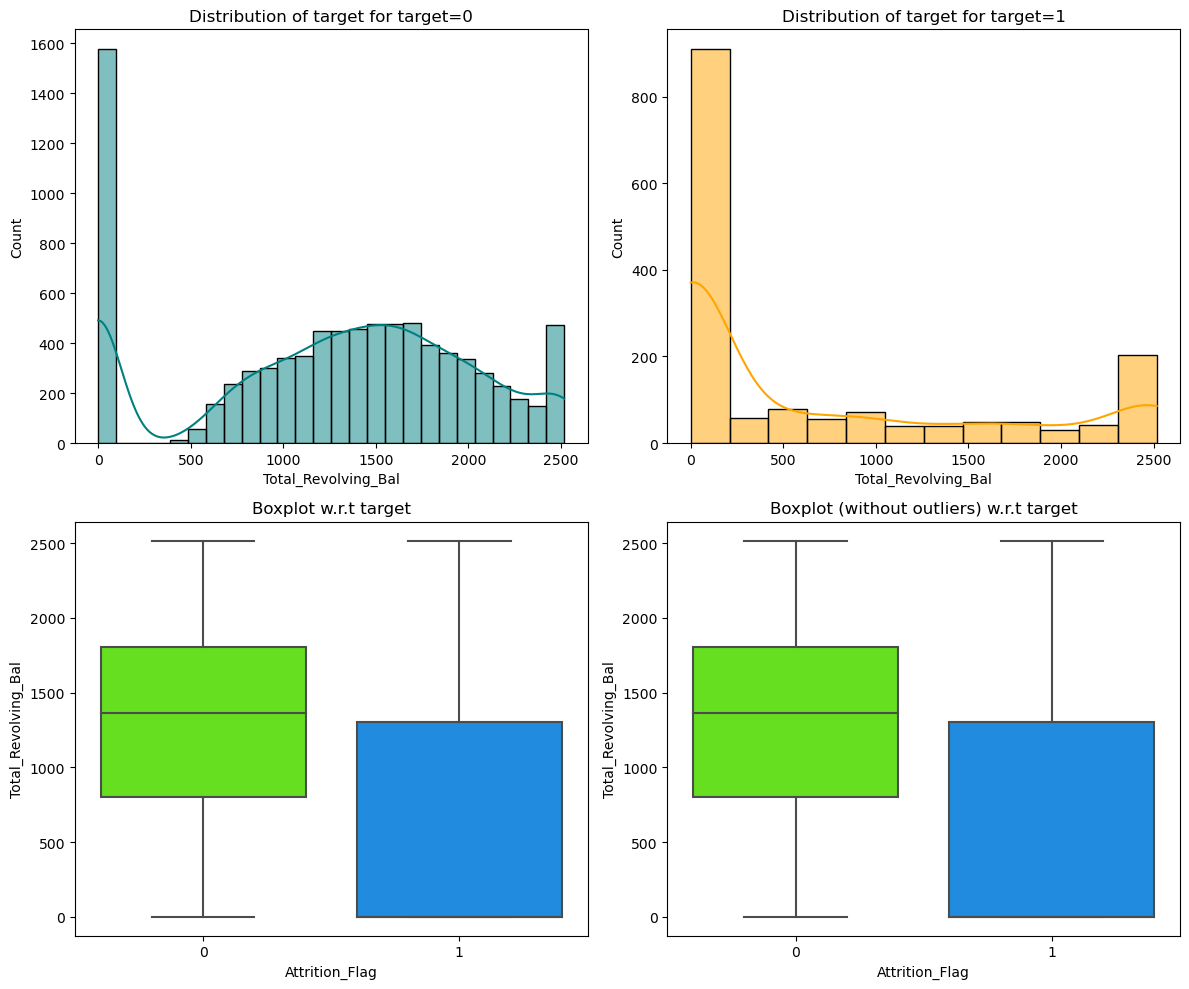

In [52]:
# visualize relationship between Attrition Flag and Total Revolving Bal
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

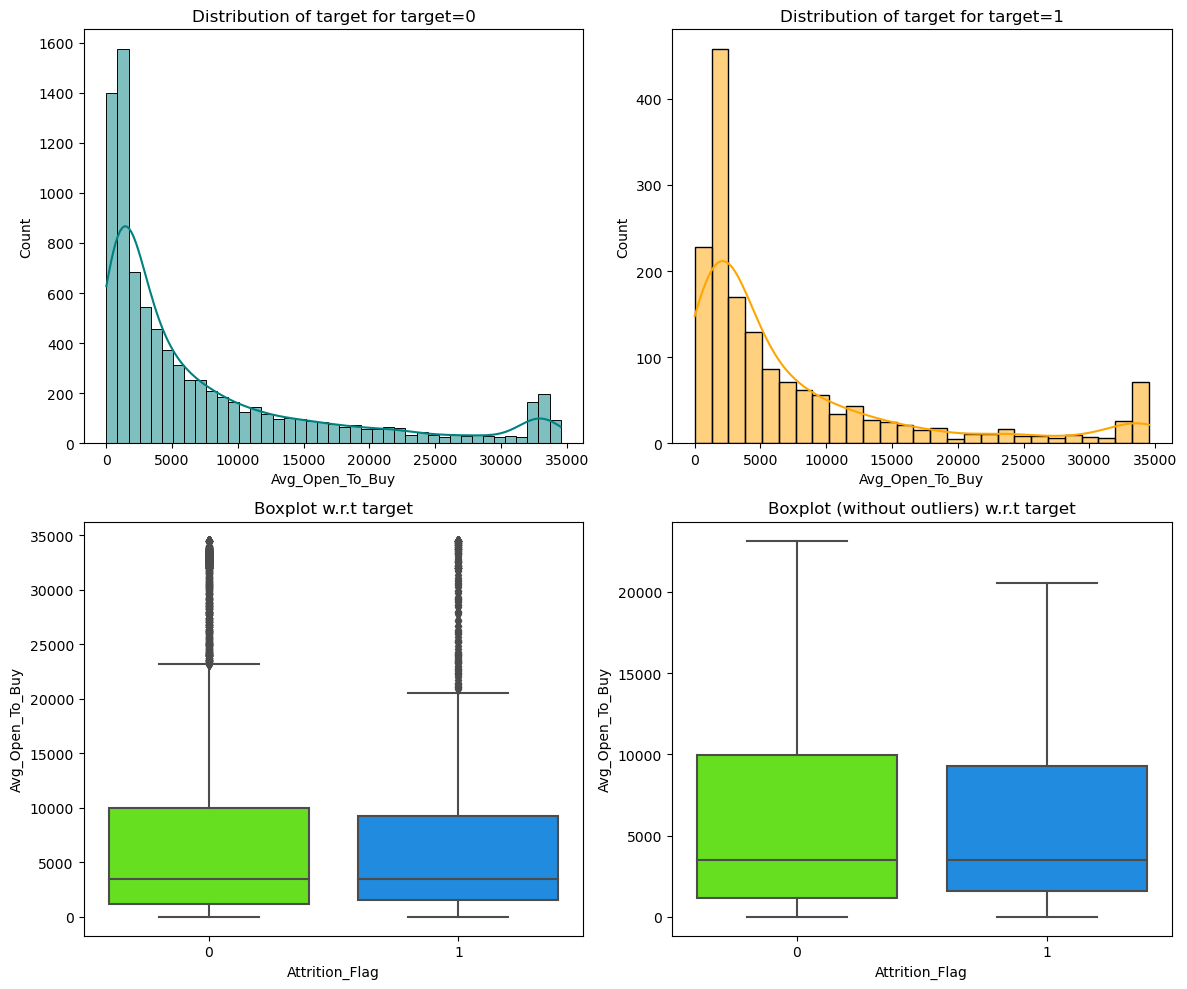

In [53]:
# visualize relationship between Attrition Flag and Avg Open To Buy
distribution_plot_wrt_target(df, "Avg_Open_To_Buy", "Attrition_Flag")

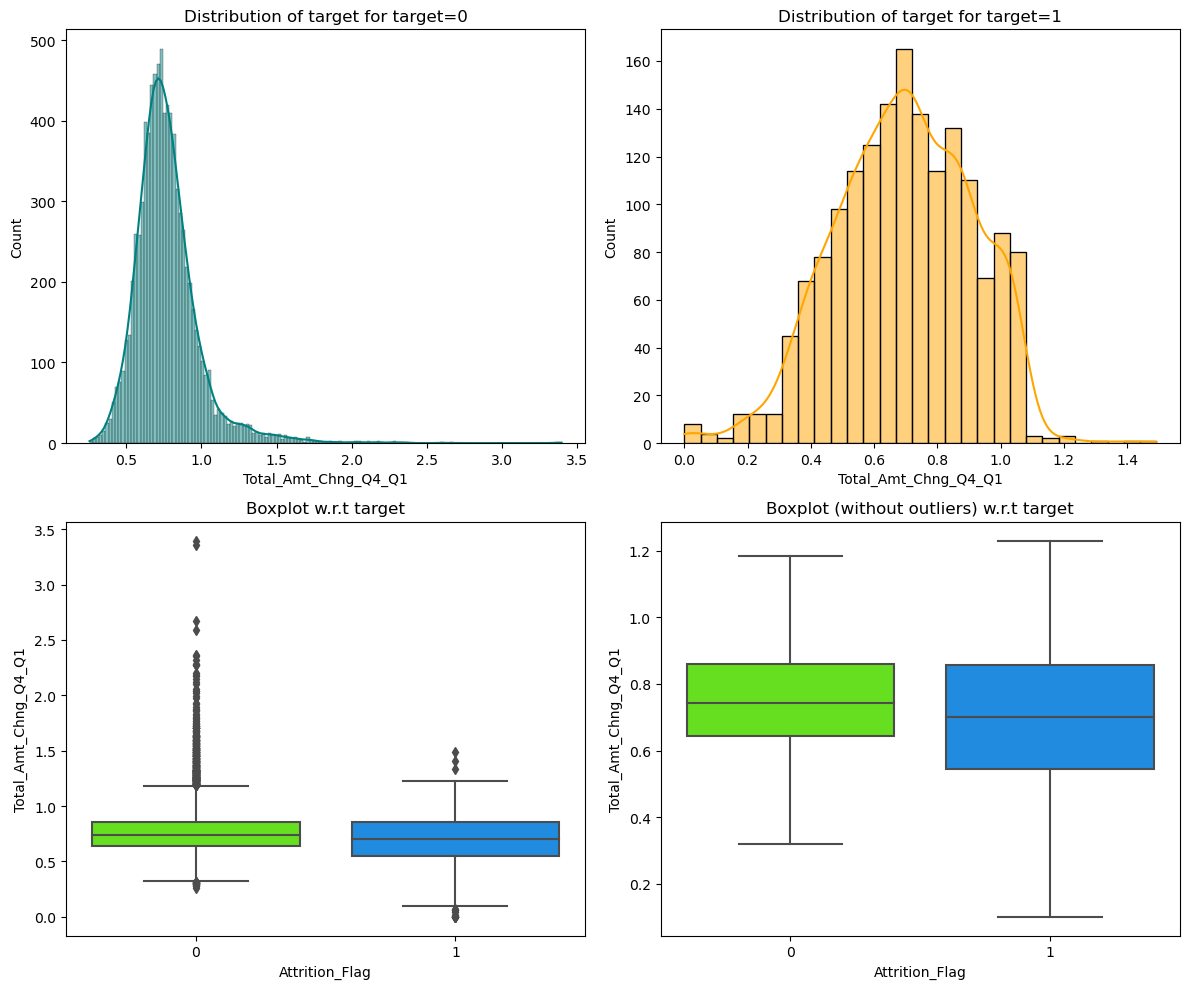

In [54]:
# visualize relationship between Attrition Flag and Total Amt Chng Q4 Q1
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

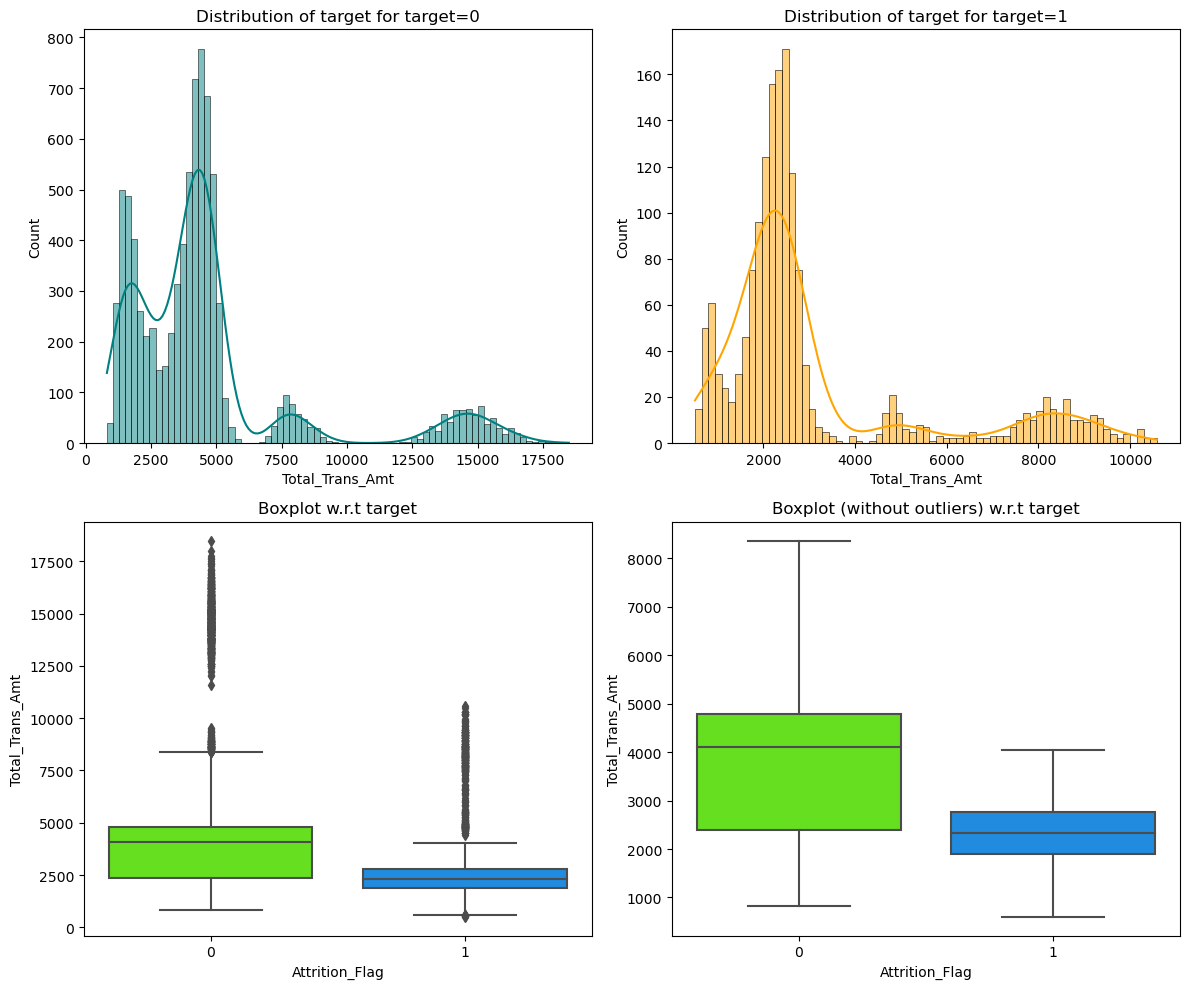

In [55]:
# visualize relationship between Attrition Flag and Total Trans Amt
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

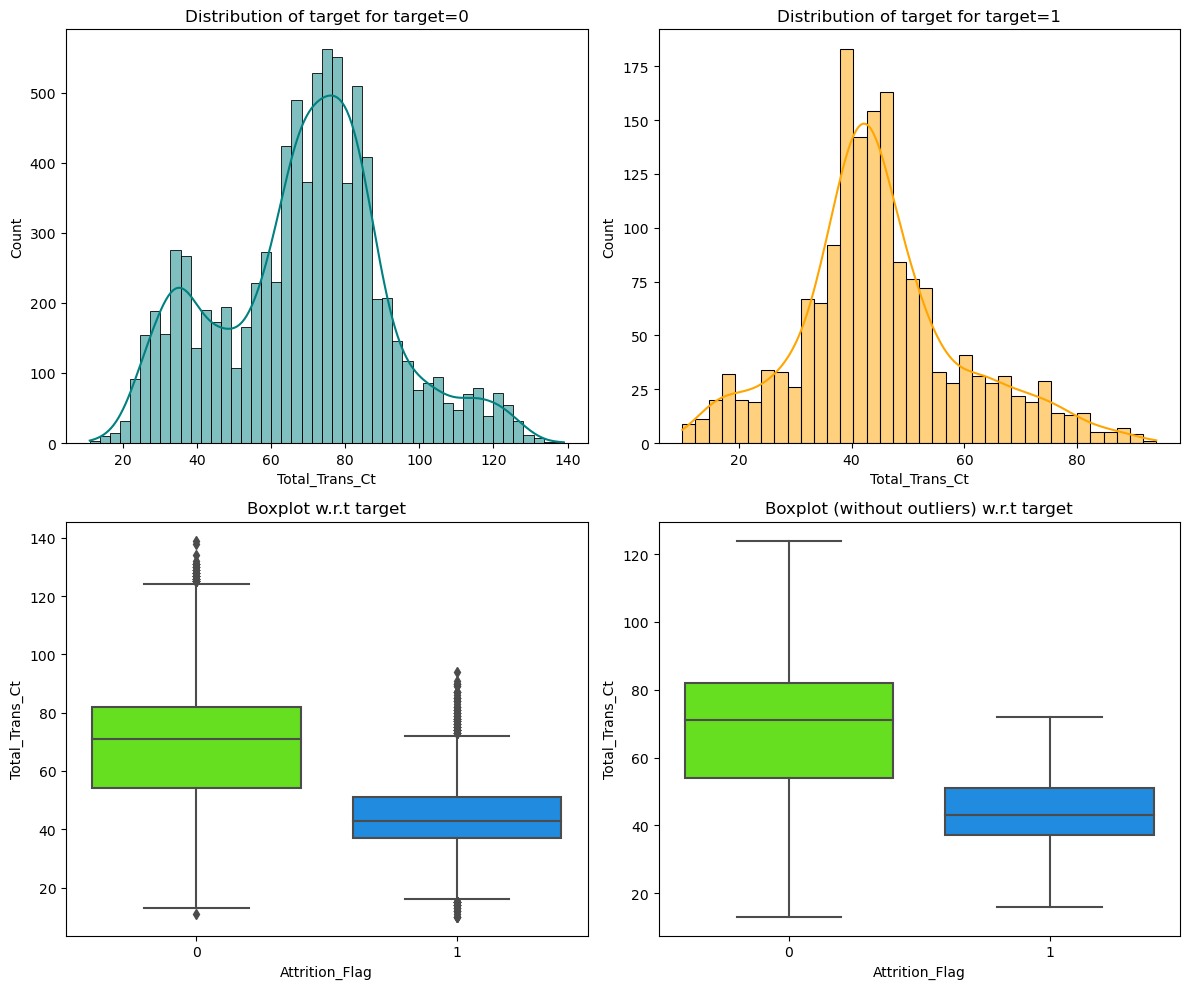

In [56]:
# visualize relationship between Attrition Flag and Total Transaction Count
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

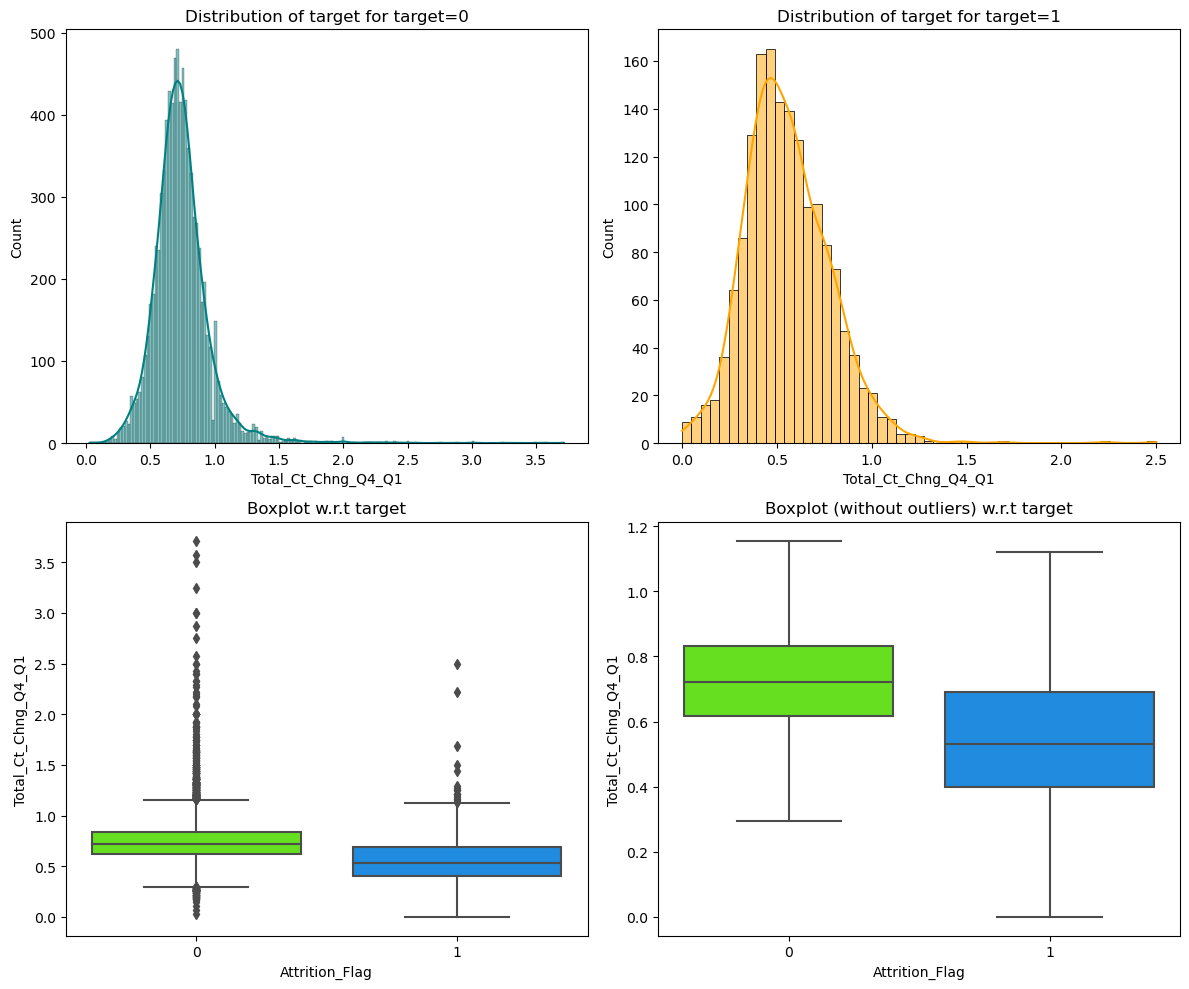

In [57]:
# visualize relationship between Attrition Flag and Total Ct Chng Q4 Q1
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

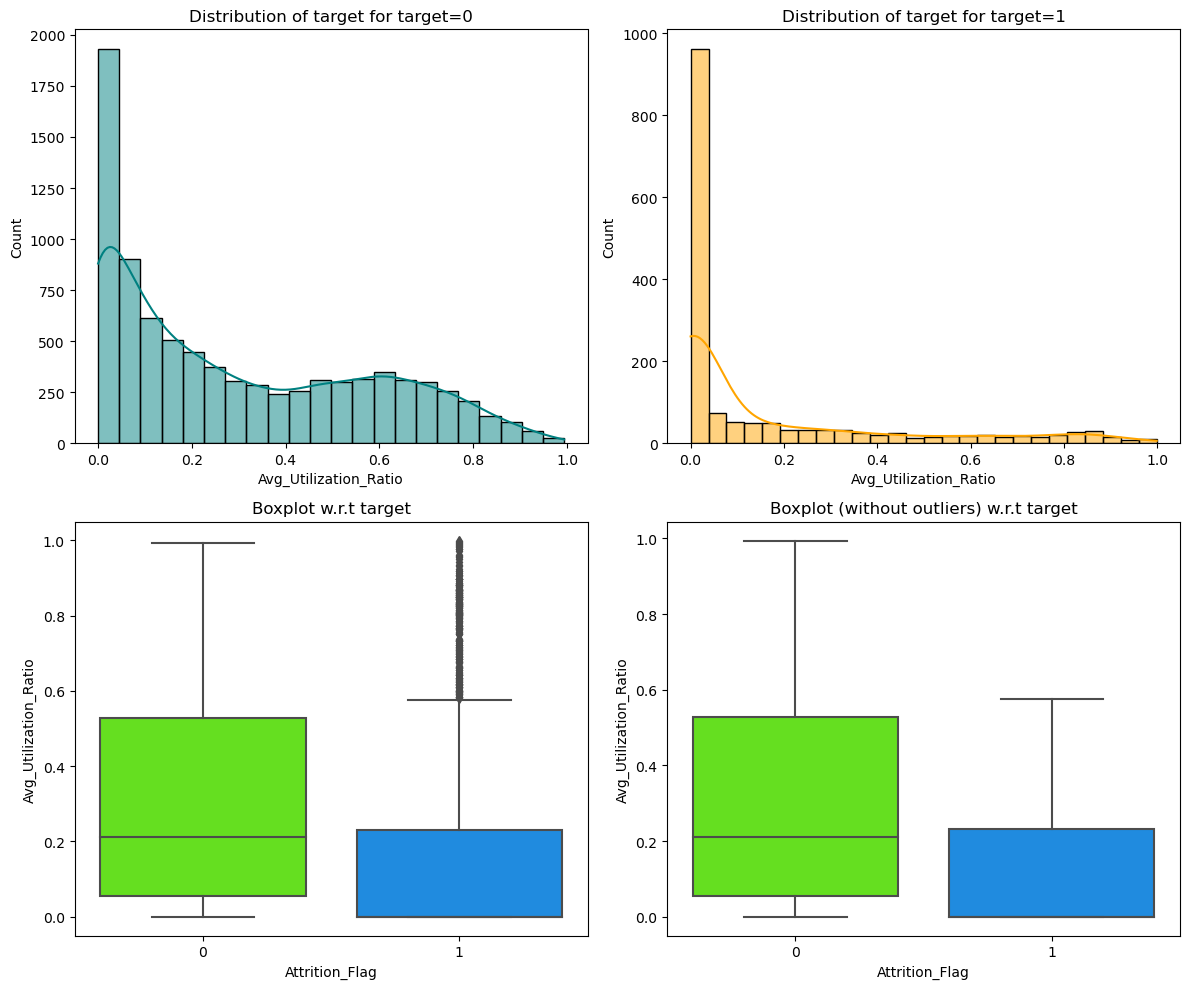

In [58]:
# visualize relationship between Attrition Flag and Avg Utilization Ratio
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio", "Attrition_Flag")

**Observations:**


1. How is the total transaction amount distributed?

Ans:

- The total transaction amount is clustered into 3 or 4 major groups, depending on how you look at it.
- Since there are 4 types of cards, it makes sense to look at the distribution by card type.

<AxesSubplot: xlabel='Total_Trans_Amt', ylabel='Card_Category'>

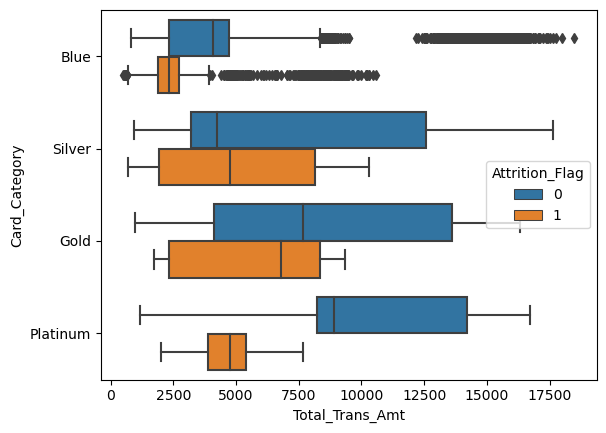

In [59]:
# visualize relationship between Total Transaction Amount and Card Category
sns.boxplot(data=df, y="Card_Category", x="Total_Trans_Amt", hue="Attrition_Flag", order=["Blue", "Silver", "Gold", "Platinum"])

- Card Type is definitely correlated with Total Transaction Amount, and that most likely is because of the different credit limit.
- Attrited Customers definitely spends _less_ than existing customers.

2. What is the distribution of the level of education of customers?

Ans:

- Most of the customers are graduates. If we assume a ranking for education level (1: Uneducated, 2: High School, 3: College, 4: Graduate, 5: Post-Graduate, 6: Doctorate), then the customers are somewhat normally distributed.

3. What is the distribution of the level of income of customers?

Ans:

- Excluding the "abc" (which we defined as unknown), most customers are in the category of less than 40K.
- If we use a ranking (basically using the income category as ranking itself), the distribution is highly skewed to the right.

4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?

Ans:

- Existing customers has more count change than attrited customers.

5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?

Ans:

- Most of the attrited customers have no inactive months.
- For customers with no inactive months, it is almost 50-50 between existing and attrited customers.

6. What are the attributes that have a strong correlation with each other?

Ans:

- Months on book and Customer age are highly correlated.
- Credit limit and Avg open to buy are highly correlated.
- Total transaction amount and Total transaction count are highly correlated.
- Total revolving balance and Avg utilization ratio are highly correlated.
- Income and Gender are highly correlated.
- We will need to drop one of the columns from each of the above pairs when we build the model.

## Data Pre-processing

### Outlier Detection

In [60]:
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

/tmp/ipykernel_158857/379633892.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)  # To find the 25th percentile
/tmp/ipykernel_158857/379633892.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)  # To find the 75th percentile


In [61]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Attrition_Flag              16.065962
Customer_Age                 0.019749
Dependent_count              0.000000
Months_on_book               3.811593
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       3.268490
Contacts_Count_12_mon        6.211119
Credit_Limit                 9.716599
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              9.509233
Total_Amt_Chng_Q4_Q1         3.910339
Total_Trans_Amt              8.847635
Total_Trans_Ct               0.019749
Total_Ct_Chng_Q4_Q1          3.890590
Avg_Utilization_Ratio        0.000000
Income_Tier                  0.000000
dtype: float64

### Train-Test Split

In [62]:
# creating the copy of the dataframe
df1 = df.copy()

In [63]:
df1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [64]:
df1.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Income_Tier                    0
dtype: int64

In [65]:
# creating an instace of the imputer to be used
mode_imputer = SimpleImputer(strategy="most_frequent")

In [66]:
# Dividing train data into X and y
# we should also drop 1 column from each variable pairs that are highly correlated with each other

X = df1.drop(["Attrition_Flag", "Customer_Age", "Total_Trans_Ct", "Credit_Limit", "Gender", "Avg_Utilization_Ratio"], axis=1)
y = df1["Attrition_Flag"]

In [67]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(7088, 15) (1520, 15) (1519, 15)


## Missing value imputation




In [68]:
columns_w_missing_val = ["Education_Level", "Marital_Status", "Income_Category"]

# Fit and transform the train data
X_train[columns_w_missing_val] = mode_imputer.fit_transform(X_train[columns_w_missing_val])

# Transform the validation data
X_val[columns_w_missing_val]  =  mode_imputer.transform(X_val[columns_w_missing_val])

# Transform the test data
X_test[columns_w_missing_val] = mode_imputer.transform(X_test[columns_w_missing_val])

print(f'Missing values in training data: {X_train.isna().sum().sum()}')
print(f'Missing values in validation data: {X_val.isna().sum().sum()}')
print(f'Missing values in test data: {X_test.isna().sum().sum()}')

Missing values in training data: 0
Missing values in validation data: 0
Missing values in test data: 0


In [69]:
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

# for all 3 dataframes, drop these columns: ['Gender_F', 'Education_Level_Uneducated', 'Marital_Status_Single', 'Income_Category_Less than $40K', 'Card_Category_Blue']

dummy_columns_to_drop = ['Education_Level_Uneducated', 'Marital_Status_Single', 'Income_Category_Less than $40K', 'Card_Category_Blue']

X_train.drop(dummy_columns_to_drop, axis=1, inplace=True)
X_val.drop(dummy_columns_to_drop, axis=1, inplace=True)
X_test.drop(dummy_columns_to_drop, axis=1, inplace=True)

### Encoding categorical variables

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [70]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

We first should define the class weight: since we emphasized on Recall, we will give more weight to the Attrited Customers (i.e. flag = 1)

In [71]:
est_class_weight = {0: 0.15, 1: 0.85}
sample_weights = class_weight.compute_sample_weight(est_class_weight, y_train)
sample_weights

array([0.15, 0.15, 0.85, ..., 0.85, 0.15, 0.15])

Sample code for model building with original data

In [72]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))
models.append(("XGBoost with Random Forest", XGBRFClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train, sample_weight=sample_weights)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train, sample_weight=sample_weights)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision Tree: 1.0
Bagging: 0.9736611062335382
Random forest: 1.0
AdaBoost: 0.9280070237050044
Gradient Boosting: 0.9692712906057945
XGBoost: 1.0
XGBoost with Random Forest: 0.9499561018437226

Validation Performance:

Decision Tree: 0.7364016736401674
Bagging: 0.7322175732217573
Random forest: 0.6527196652719666
AdaBoost: 0.8619246861924686
Gradient Boosting: 0.895397489539749
XGBoost: 0.8535564853556485
XGBoost with Random Forest: 0.8744769874476988


### Model Building with Oversampled data


In [73]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [74]:
# class weight
sample_weights_over = class_weight.compute_sample_weight(est_class_weight, y_train_over)
sample_weights_over

array([0.15, 0.15, 0.85, ..., 0.85, 0.85, 0.85])

In [75]:
overfitted_models = []  # Empty list to store all the models

# Appending models into the list
overfitted_models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
overfitted_models.append(("Bagging", BaggingClassifier(random_state=1)))
overfitted_models.append(("Random forest", RandomForestClassifier(random_state=1)))
overfitted_models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
overfitted_models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
overfitted_models.append(("XGBoost", XGBClassifier(random_state=1)))
overfitted_models.append(("XGBoost with Random Forest", XGBRFClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in overfitted_models:
    model.fit(X_train_over, y_train_over, sample_weight=sample_weights_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in overfitted_models:
    model.fit(X_train_over, y_train_over, sample_weight=sample_weights_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision Tree: 1.0
Bagging: 0.9966380904353673
Random forest: 1.0
AdaBoost: 0.9862161707850059
Gradient Boosting: 0.9979828542612204
XGBoost: 1.0
XGBoost with Random Forest: 0.9939485627836612

Validation Performance:

Decision Tree: 0.7447698744769874
Bagging: 0.7489539748953975
Random forest: 0.7405857740585774
AdaBoost: 0.9037656903765691
Gradient Boosting: 0.9456066945606695
XGBoost: 0.8870292887029289
XGBoost with Random Forest: 0.9665271966527197


### Model Building with Undersampled data

In [76]:

# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [77]:
# class weight
# class weight
sample_weights_under = class_weight.compute_sample_weight(est_class_weight, y_train_un)

In [78]:
underfitted_models = []  # Empty list to store all the models

# Appending models into the list
underfitted_models.append(("Decision Tree", DecisionTreeClassifier(random_state=1)))
underfitted_models.append(("Bagging", BaggingClassifier(random_state=1)))
underfitted_models.append(("Random forest", RandomForestClassifier(random_state=1)))
underfitted_models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
underfitted_models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
underfitted_models.append(("XGBoost", XGBClassifier(random_state=1)))
underfitted_models.append(("XGBoost with Random Forest", XGBRFClassifier(random_state=1)))

print("\n" "Training Performance:" "\n")
for name, model in underfitted_models:
    model.fit(X_train_un, y_train_un, sample_weight=sample_weights_under)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in underfitted_models:
    model.fit(X_train_un, y_train_un, sample_weight=sample_weights_under)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Decision Tree: 1.0
Bagging: 0.9815627743634767
Random forest: 1.0
AdaBoost: 0.9859525899912204
Gradient Boosting: 0.9991220368744512
XGBoost: 1.0
XGBoost with Random Forest: 0.9947322212467077

Validation Performance:

Decision Tree: 0.8535564853556485
Bagging: 0.8619246861924686
Random forest: 0.891213389121339
AdaBoost: 0.9581589958158996
Gradient Boosting: 0.9707112970711297
XGBoost: 0.9539748953974896
XGBoost with Random Forest: 0.9665271966527197


### HyperparameterTuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

In [79]:
# first, let us make the scorer function
scorer = make_scorer(recall_score)

In [80]:
# define all parameter grids as above for each model
param_grid = {
    "Decision Tree": {
        'max_depth': np.arange(2,6),
        'min_samples_leaf': [1, 4, 7],
        'max_leaf_nodes' : [10, 15],
        'min_impurity_decrease': [0.0001,0.001]
    },
    "Bagging": {
        'max_samples': [0.8,0.9,1],
        'max_features': [0.7,0.8,0.9],
        'n_estimators' : [30,50,70]
    },
    "Random forest": {
        "n_estimators": [50,110,25],
        "min_samples_leaf": np.arange(1, 4),
        "max_features": [0.3, 0.4, 0.5,'sqrt'],
        "max_samples": np.arange(0.4, 0.7, 0.1)
    },
    "AdaBoost": {
        "n_estimators": np.arange(50,110,25),
        "learning_rate": [0.01,0.1,0.05],
        "estimator": [
            DecisionTreeClassifier(max_depth=2, random_state=1),
            DecisionTreeClassifier(max_depth=3, random_state=1),
        ]
    },
    "Gradient Boosting": {
        "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
        "n_estimators": np.arange(50,110,25),
        "learning_rate": [0.01,0.1,0.05],
        "subsample":[0.7,0.9],
        "max_features":[0.5,0.7,1]
    },
    "XGBoost": {
        'n_estimators':np.arange(50,110,25),
        'scale_pos_weight':[1,2,5,10],
        'learning_rate':[0.01,0.1,0.05],
        'gamma':[1,3],
        'subsample':[0.7,0.9]
    },
    "XGBoost with Random Forest": {
        'n_estimators':np.arange(50,110,25),
        'scale_pos_weight':[1,2,5,10],
        'learning_rate':[0.01,0.1,0.05],
        'gamma':[1,3],
        'subsample':[0.7,0.9]
    }
}

In [81]:
# function to call the RandomizedSearchCV function for each model
def random_search(
    model_name,
    sample_type,
    model_class,
    param_grid,
    X_train,
    y_train,
    scorer,
    cv=5,
    n_iter=10,
    sample_weights=None,
    performance_df=None,
):
    """
    Function to call the RandomizedSearchCV function for each model

    model: classifier
    param_grid: parameter grid
    X_train: independent variables of train data
    y_train: dependent variable of train data
    scorer: scorer function
    cv: number of cross validations (default is 3)
    n_iter: number of iterations (default is 10)
    """

    model = model_class(random_state=1)

    # calling the RandomizedSearchCV function
    # estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        scoring=scorer,
        cv=cv,
        n_iter=n_iter,
        n_jobs=-1,
        random_state=1,
    )

    # fitting the model
    # however, if the model itself is XGBoost or XGBoost with Random Forest, we need to skip passing in the sample weights, since the model itself has a parameter called scale_pos_weight
    if model_name == "XGBoost" or model_name == "XGBoost with Random Forest":
        random_search.fit(X_train, y_train)
    else:
        random_search.fit(X_train, y_train, sample_weight=sample_weights)

    # printing the results
    print(f"{model_name} with {sample_type} data:")
    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}")

    if performance_df is None:
        performance_df = pd.DataFrame(
            columns=[
                "Model",
                "Sample Type",
                "Best Parameters",
                "Tuned_Model",
                "Training_Accuracy",
                "Training_Recall",
                "Training_Precision",
                "Training_F1",
                "Validation_Accuracy",
                "Validation_Recall",
                "Validation_Precision",
                "Validation_F1",
                "Test_Accuracy",
                "Test_Recall",
                "Test_Precision",
                "Test_F1",
            ]
        )

    tuned_model = model_class(**random_search.best_params_, random_state=1)
    if model_name == "XGBoost" or model_name == "XGBoost with Random Forest":
        tuned_model.fit(X_train, y_train)
    else:
        tuned_model.fit(X_train, y_train, sample_weight=sample_weights)

    training_performance = model_performance_classification_sklearn(
        tuned_model, X_train, y_train
    )
    validation_performance = model_performance_classification_sklearn(
        tuned_model, X_val, y_val
    )
    test_performance = model_performance_classification_sklearn(
        tuned_model, X_test, y_test
    )

    performance_df = performance_df.append(
        {
            "Model": model_name,
            "Sample Type": sample_type,
            "Best Parameters": random_search.best_params_,
            "Tuned_Model": tuned_model,
            "Training_Accuracy": training_performance["Accuracy"].values[0],
            "Training_Recall": training_performance["Recall"].values[0],
            "Training_Precision": training_performance["Precision"].values[0],
            "Training_F1": training_performance["F1"].values[0],
            "Validation_Accuracy": validation_performance["Accuracy"].values[0],
            "Validation_Recall": validation_performance["Recall"].values[0],
            "Validation_Precision": validation_performance["Precision"].values[0],
            "Validation_F1": validation_performance["F1"].values[0],
            "Test_Accuracy": test_performance["Accuracy"].values[0],
            "Test_Recall": test_performance["Recall"].values[0],
            "Test_Precision": test_performance["Precision"].values[0],
            "Test_F1": test_performance["F1"].values[0],
        },
        ignore_index=True,
    )

    return performance_df

In [82]:
# make a constructor mapper to map the model name to the model object
model_mapper = {
    "Decision Tree": DecisionTreeClassifier,
    "Bagging": BaggingClassifier,
    "Random forest": RandomForestClassifier,
    "AdaBoost": AdaBoostClassifier,
    "Gradient Boosting": GradientBoostingClassifier,
    "XGBoost": XGBClassifier,
    "XGBoost with Random Forest": XGBRFClassifier
}

In [83]:
performance_df = pd.DataFrame(
    columns=[
        "Model",
        "Sample Type",
        "Best Parameters",
        "Tuned_Model",
        "Training_Accuracy",
        "Training_Recall",
        "Training_Precision",
        "Training_F1",
        "Validation_Accuracy",
        "Validation_Recall",
        "Validation_Precision",
        "Validation_F1",
        "Test_Accuracy",
        "Test_Recall",
        "Test_Precision",
        "Test_F1",
    ]
)

In [84]:
# within the following loop, call each model 3 times: once with original data, once with oversampled data, and once with undersampled data
for model in model_mapper.keys():
    performance_df = random_search(model, "original", model_mapper[model], param_grid[model], X_train, y_train, scorer, cv=5, n_iter=10, sample_weights=sample_weights, performance_df=performance_df)
    performance_df = random_search(model, "oversampled", model_mapper[model], param_grid[model], X_train_over, y_train_over, scorer, cv=5, n_iter=10, sample_weights=sample_weights_over, performance_df=performance_df)
    performance_df = random_search(model, "undersampled", model_mapper[model], param_grid[model], X_train_un, y_train_un, scorer, cv=5, n_iter=10, sample_weights=sample_weights_under, performance_df=performance_df)


Decision Tree with original data:
Best parameters: {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 10, 'max_depth': 2}
Best score: 0.9060823865831982
Decision Tree with oversampled data:
Best parameters: {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3}
Best score: 0.983863425942286


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(
/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Decision Tree with undersampled data:
Best parameters: {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3}
Best score: 0.9841873405981915


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Bagging with original data:
Best parameters: {'n_estimators': 30, 'max_samples': 0.8, 'max_features': 0.9}
Best score: 0.7734755390679341


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Bagging with oversampled data:
Best parameters: {'n_estimators': 50, 'max_samples': 0.8, 'max_features': 0.8}
Best score: 0.9268892014333069


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Bagging with undersampled data:
Best parameters: {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8}
Best score: 0.9043009506144216


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Random forest with original data:
Best parameters: {'n_estimators': 50, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 0.5}
Best score: 0.7963096066156582


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Random forest with oversampled data:
Best parameters: {'n_estimators': 110, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'sqrt'}
Best score: 0.9573100762592673


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Random forest with undersampled data:
Best parameters: {'n_estimators': 110, 'min_samples_leaf': 3, 'max_samples': 0.4, 'max_features': 'sqrt'}
Best score: 0.9490493855784837


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


AdaBoost with original data:
Best parameters: {'n_estimators': 75, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}
Best score: 0.9209676172810882


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


AdaBoost with oversampled data:
Best parameters: {'n_estimators': 50, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}
Best score: 0.9952935522400719


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


AdaBoost with undersampled data:
Best parameters: {'n_estimators': 50, 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)}
Best score: 0.9938519205502743


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Gradient Boosting with original data:
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)}
Best score: 0.861275987325141


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Gradient Boosting with oversampled data:
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)}
Best score: 0.9971428571428571


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


Gradient Boosting with undersampled data:
Best parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)}
Best score: 1.0


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with original data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9359069479867068


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with oversampled data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9904197440119866


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with undersampled data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9780508540072649


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with Random Forest with original data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9253729036247005


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with Random Forest with oversampled data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9878987356086253


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


XGBoost with Random Forest with undersampled data:
Best parameters: {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 100, 'learning_rate': 0.01, 'gamma': 3}
Best score: 0.9771697967385424


/tmp/ipykernel_158857/2192814701.py:91: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append(


## Model Comparison and Final Model Selection

In [85]:
pd.options.display.max_rows = None
performance_df.sort_values(by=["Validation_Recall", "Validation_F1"], ascending=False)

,Model,Sample Type,Best Parameters,Tuned_Model,Training_Accuracy,Training_Recall,Training_Precision,Training_F1,Validation_Accuracy,Validation_Recall,Validation_Precision,Validation_F1,Test_Accuracy,Test_Recall,Test_Precision,Test_F1
14,Gradient Boosting,undersampled,"{'subsample': 0.7, 'n_estimators': 50, 'max_fe...",([DecisionTreeRegressor(criterion='friedman_ms...,0.519315,1.000000,0.509848,0.675363,0.186184,1.000000,0.161924,0.278717,0.192232,1.000000,0.168699,0.288696
13,Gradient Boosting,oversampled,"{'subsample': 0.7, 'n_estimators': 50, 'max_fe...",([DecisionTreeRegressor(criterion='friedman_ms...,0.542696,1.000000,0.522300,0.686199,0.223026,0.995816,0.167842,0.287266,0.233048,1.000000,0.176096,0.299459
11,AdaBoost,undersampled,"{'n_estimators': 50, 'learning_rate': 0.05, 'e...","(DecisionTreeClassifier(max_depth=2, random_st...",0.735294,0.997366,0.654378,0.790261,0.569079,0.979079,0.264706,0.416741,0.572087,1.000000,0.276974,0.433798
10,AdaBoost,oversampled,"{'n_estimators': 50, 'learning_rate': 0.05, 'e...","(DecisionTreeClassifier(max_depth=2, random_st...",0.720709,0.998487,0.641885,0.781425,0.518421,0.979079,0.243496,0.390000,0.526662,1.000000,0.257231,0.409203
19,XGBoost with Random Forest,oversampled,"{'subsample': 0.7, 'scale_pos_weight': 10, 'n_...","XGBRFClassifier(base_score=None, booster=None,...",0.850731,0.998151,0.770868,0.869909,0.740132,0.974895,0.374598,0.541231,0.716919,0.987952,0.365527,0.533623
16,XGBoost,oversampled,"{'subsample': 0.7, 'scale_pos_weight': 10, 'n_...","XGBClassifier(base_score=None, booster=None, c...",0.861741,0.998487,0.784055,0.878373,0.761842,0.970711,0.395230,0.561743,0.741277,0.987952,0.386792,0.555932
17,XGBoost,undersampled,"{'subsample': 0.7, 'scale_pos_weight': 10, 'n_...","XGBClassifier(base_score=None, booster=None, c...",0.851624,1.000000,0.771158,0.870795,0.742763,0.970711,0.376623,0.542690,0.735352,0.987952,0.381395,0.550336
20,XGBoost with Random Forest,undersampled,"{'subsample': 0.7, 'scale_pos_weight': 10, 'n_...","XGBRFClassifier(base_score=None, booster=None,...",0.838455,0.999122,0.756146,0.860817,0.723684,0.970711,0.359690,0.524887,0.719552,0.991968,0.368107,0.536957
2,Decision Tree,undersampled,"{'min_samples_leaf': 7, 'min_impurity_decrease...","DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.748464,0.986831,0.668252,0.796881,0.613158,0.966527,0.284834,0.440000,0.594470,0.983936,0.285881,0.443038
1,Decision Tree,oversampled,"{'min_samples_leaf': 7, 'min_impurity_decrease...","DecisionTreeClassifier(max_depth=3, max_leaf_n...",0.771390,0.986552,0.689740,0.811869,0.628947,0.958159,0.292465,0.448141,0.613562,0.979920,0.295400,0.453953


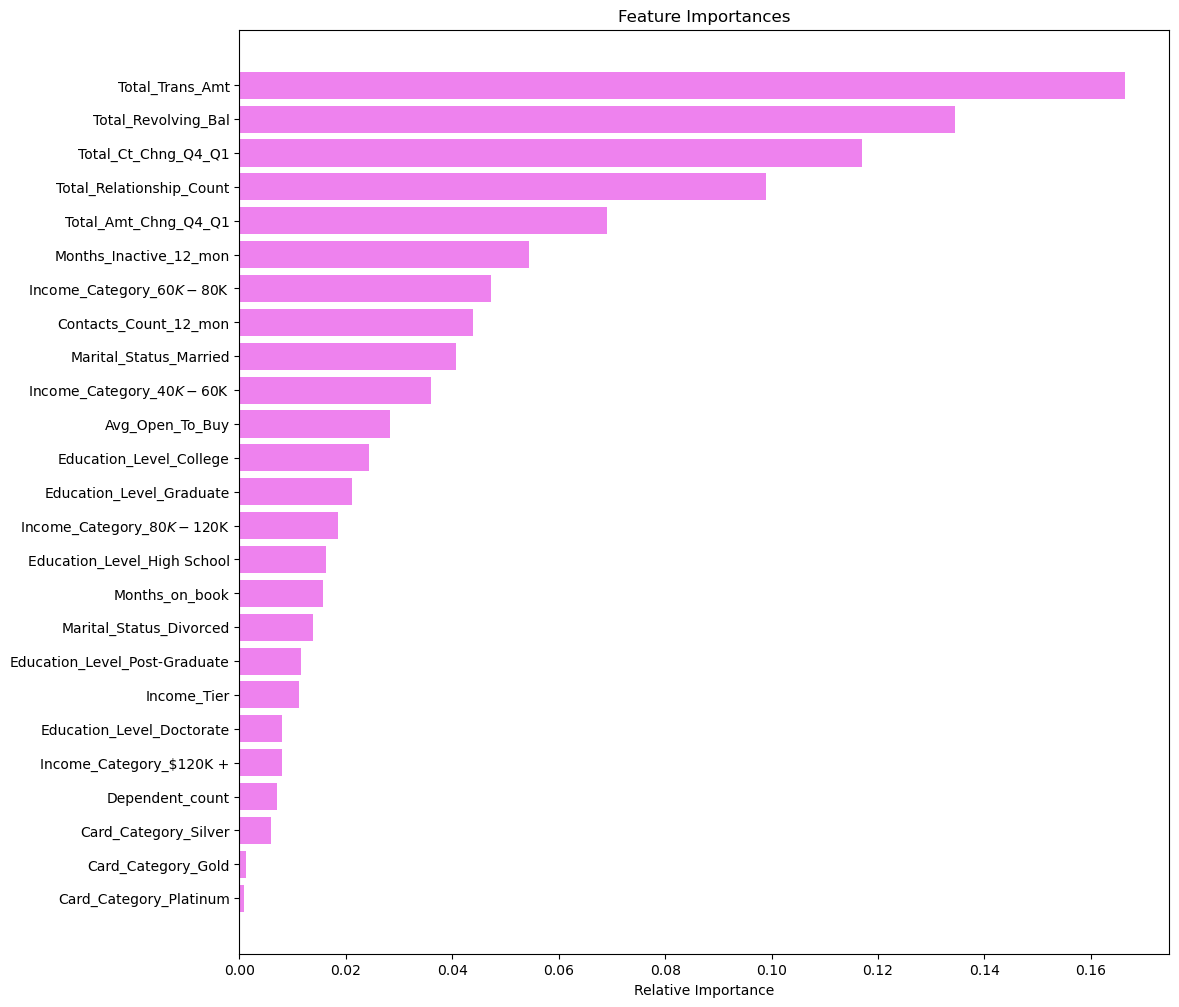

In [87]:
# get the best model from the above dataframe. Criteria: highest validation recall, then highest validation F1
# however, we would skip undersampled data, since undersampling is generally not a good strategy
best_model_row = performance_df[performance_df['Sample Type'] != 'undersampled'].sort_values(by=["Validation_Recall", "Validation_F1"], ascending=False).iloc[0]
best_model = best_model_row["Tuned_Model"]

feature_names = X_train.columns
importances =  best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Test set final performance

In [90]:
print(f"The best model is {best_model_row['Model']} with {best_model_row['Sample Type']} data, with recall on final test data being {best_model_row['Test_Recall']}")

The best model is Gradient Boosting with oversampled data, with recall on final test data being 1.0


In [91]:
from sklearn import tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

AttributeError: 'GradientBoostingClassifier' object has no attribute 'tree_'

# Business Insights and Conclusions

***